In [1]:
# %%capture
# !pip install --upgrade matplotlib numpy==1.26.0 # need refresh enviroment after installation

In [3]:
# %%capture
# !pip install basemap phik sweetviz

In [4]:
import warnings
warnings.filterwarnings('ignore')

import phik

import numpy as np
import pandas as pd

import seaborn as sns
import sweetviz as sv
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.basemap import Basemap

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

%matplotlib inline

In [5]:
sns.set_theme()

## Знакомство с данными

Набор данных состоит из 20 различных категориальных и непрерывных параметров 513 месторождений нефти.

In [6]:
path = 'dataset_geologist.xlsx'
data = pd.read_excel(path, index_col='Unnamed: 0')

In [7]:
new_col_names = ['_'.join(s.split()[1:]) for s in data.columns]
new_col_names[0] = 'num'

In [8]:
data.columns = new_col_names

In [9]:
data.head()

num        Field_name        Reservoir_unit       Country       Region  \
0    6            ABQAIQ                ARAB D  SAUDI ARABIA  MIDDLE EAST   
1   10      ABU GHARADIG              BAHARIYA         EGYPT       AFRICA   
2   11  ABU MADI-EL QARA   ABU MADI (LEVEL II)         EGYPT       AFRICA   
3   12  ABU MADI-EL QARA  ABU MADI (LEVEL III)         EGYPT       AFRICA   
4   20       AL HUWAISAH               SHUAIBA          OMAN  MIDDLE EAST   

     Basin_name Tectonic_regime  Latitude  Longitude Operator_company  ...  \
0      THE GULF     COMPRESSION   26.0800    49.8100     SAUDI ARAMCO  ...   
1  ABU GHARADIG       EXTENSION   29.7422    28.4925            GUPCO  ...   
2    NILE DELTA     STRIKE-SLIP   31.4382    31.3616             IEOC  ...   
3    NILE DELTA     STRIKE-SLIP   31.4382    31.3616             IEOC  ...   
4    FAHUD SALT     COMPRESSION   21.9607    56.0452              PDO  ...   

  Hydrocarbon_type_(main) Reservoir_status_(current) Structural_setting  \
0                     OIL               REJUVENATING           FORELAND   
1          GAS-CONDENSATE          MATURE PRODUCTION               RIFT   
2                     GAS       DECLINING PRODUCTION             WRENCH   
3                     GAS       DECLINING PRODUCTION             WRENCH   
4                     OIL               REJUVENATING               SALT   

  Depth_(top_reservoir_ft_TVD)  Reservoir_period         Lithology_(main)  \
0                         6050          JURASSIC                LIMESTONE   
1                        10282        CRETACEOUS                SANDSTONE   
2                         9843           NEOGENE  THINLY-BEDDED SANDSTONE   
3                        10499           NEOGENE                SANDSTONE   
4                         4955        CRETACEOUS                LIMESTONE   

  Thickness_(gross_average_ft)  Thickness_(net_pay_average_ft)  \
0                        250.0                           184.0   
1                        745.0                           144.0   
2                        115.0                            66.0   
3                        509.0                           410.0   
4                        250.0                           100.0   

   Porosity_(matrix_average_%)  Permeability_(air_average_mD)  
0                         21.0                          410.0  
1                         10.0                            8.0  
2                         22.0                          200.0  
3                         20.0                          300.0  
4                         21.0                           60.0  

[5 rows x 21 columns]

In [10]:
data.columns

Index(['num', 'Field_name', 'Reservoir_unit', 'Country', 'Region',
       'Basin_name', 'Tectonic_regime', 'Latitude', 'Longitude',
       'Operator_company', 'Onshore_or_offshore', 'Hydrocarbon_type_(main)',
       'Reservoir_status_(current)', 'Structural_setting',
       'Depth_(top_reservoir_ft_TVD)', 'Reservoir_period', 'Lithology_(main)',
       'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)',
       'Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)'],
      dtype='object')

In [11]:
data.shape

(514, 21)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, 0 to 513
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   num                             514 non-null    int64  
 1   Field_name                      514 non-null    object 
 2   Reservoir_unit                  514 non-null    object 
 3   Country                         514 non-null    object 
 4   Region                          514 non-null    object 
 5   Basin_name                      514 non-null    object 
 6   Tectonic_regime                 442 non-null    object 
 7   Latitude                        514 non-null    float64
 8   Longitude                       514 non-null    float64
 9   Operator_company                514 non-null    object 
 10  Onshore_or_offshore             514 non-null    object 
 11  Hydrocarbon_type_(main)         514 non-null    object 
 12  Reservoir_status_(current)      514 non-n

In [13]:
data.dtypes

num                                 int64
Field_name                         object
Reservoir_unit                     object
Country                            object
Region                             object
Basin_name                         object
Tectonic_regime                    object
Latitude                          float64
Longitude                         float64
Operator_company                   object
Onshore_or_offshore                object
Hydrocarbon_type_(main)            object
Reservoir_status_(current)         object
Structural_setting                 object
Depth_(top_reservoir_ft_TVD)        int64
Reservoir_period                   object
Lithology_(main)                   object
Thickness_(gross_average_ft)      float64
Thickness_(net_pay_average_ft)    float64
Porosity_(matrix_average_%)       float64
Permeability_(air_average_mD)     float64
dtype: object

In [14]:
data.isna().sum()

num                                0
Field_name                         0
Reservoir_unit                     0
Country                            0
Region                             0
Basin_name                         0
Tectonic_regime                   72
Latitude                           0
Longitude                          0
Operator_company                   0
Onshore_or_offshore                0
Hydrocarbon_type_(main)            0
Reservoir_status_(current)         0
Structural_setting                 0
Depth_(top_reservoir_ft_TVD)       0
Reservoir_period                   0
Lithology_(main)                   0
Thickness_(gross_average_ft)       0
Thickness_(net_pay_average_ft)     0
Porosity_(matrix_average_%)       72
Permeability_(air_average_mD)      0
dtype: int64

In [15]:
mask = data['Porosity_(matrix_average_%)'].isna()
train, test = data[~mask], data[mask]
train.shape, test.shape

((442, 21), (72, 21))

In [16]:
df = train.copy()

In [17]:
assert df.isna().sum().sum() == 0, 'В df остались пропуски!'

### Целевые переменные

**targets: Tectonic_regime, Porosity_(matrix_average_%)**

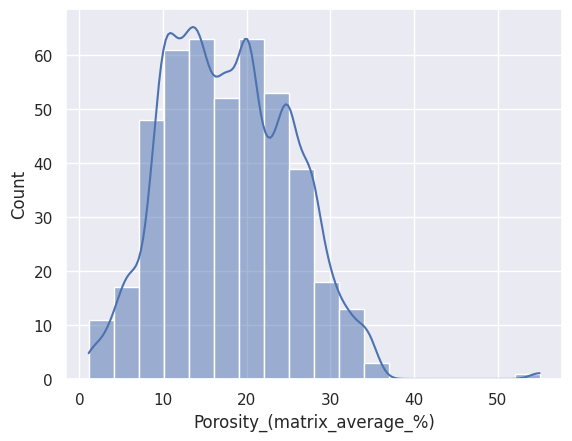

In [18]:
sns.histplot(x=df['Porosity_(matrix_average_%)'], kde=True, kde_kws={'bw_adjust': 0.5});

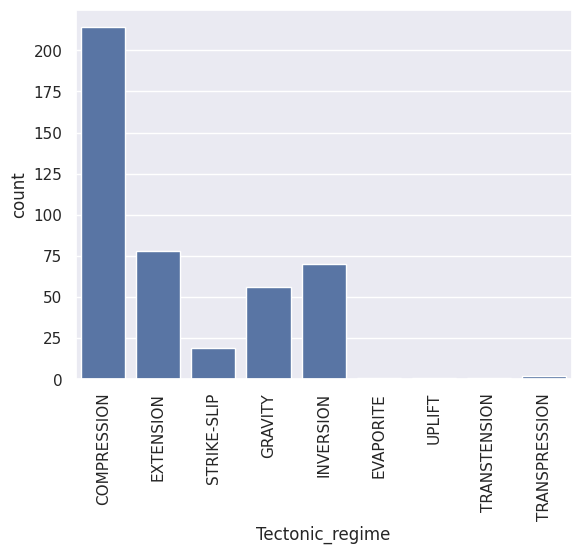

In [19]:
sns.countplot(x=df['Tectonic_regime'])
plt.xticks(rotation=90);

In [20]:
df['Tectonic_regime'].value_counts()

Tectonic_regime
COMPRESSION      214
EXTENSION         78
INVERSION         70
GRAVITY           56
STRIKE-SLIP       19
TRANSPRESSION      2
EVAPORITE          1
UPLIFT             1
TRANSTENSION       1
Name: count, dtype: int64

## Числовые признаки

In [21]:
num_cols = df.select_dtypes(exclude='object')
num_cols.shape

(442, 8)

In [22]:
num_cols.describe()

num    Latitude   Longitude  Depth_(top_reservoir_ft_TVD)  \
count   442.000000  442.000000  442.000000                    442.000000   
mean    535.769231   35.078113   -8.349127                   6613.658371   
std     312.948093   21.861937   87.891701                   3572.468358   
min       6.000000  -38.398900 -151.615300                    220.000000   
25%     262.250000   28.124825 -102.403650                   3824.500000   
50%     521.500000   37.642350    2.247700                   6137.500000   
75%     805.000000   51.285650   57.562525                   9071.500000   
max    1071.000000   76.446200  148.417000                  19888.000000   

       Thickness_(gross_average_ft)  Thickness_(net_pay_average_ft)  \
count                    442.000000                      442.000000   
mean                     784.540724                      189.061946   
std                     1442.899648                      282.161279   
min                       11.000000                        0.000000   
25%                      135.750000                       43.000000   
50%                      328.000000                      100.000000   
75%                      748.750000                      206.500000   
max                    12500.000000                     2976.000000   

       Porosity_(matrix_average_%)  Permeability_(air_average_mD)  
count                   442.000000                     442.000000  
mean                     17.929955                     469.916425  
std                       7.554253                    1017.081304  
min                       1.100000                       0.010000  
25%                      12.000000                      10.000000  
50%                      17.900000                      79.500000  
75%                      24.000000                     400.000000  
max                      55.000000                    7500.000000

### Geospatial data visualization

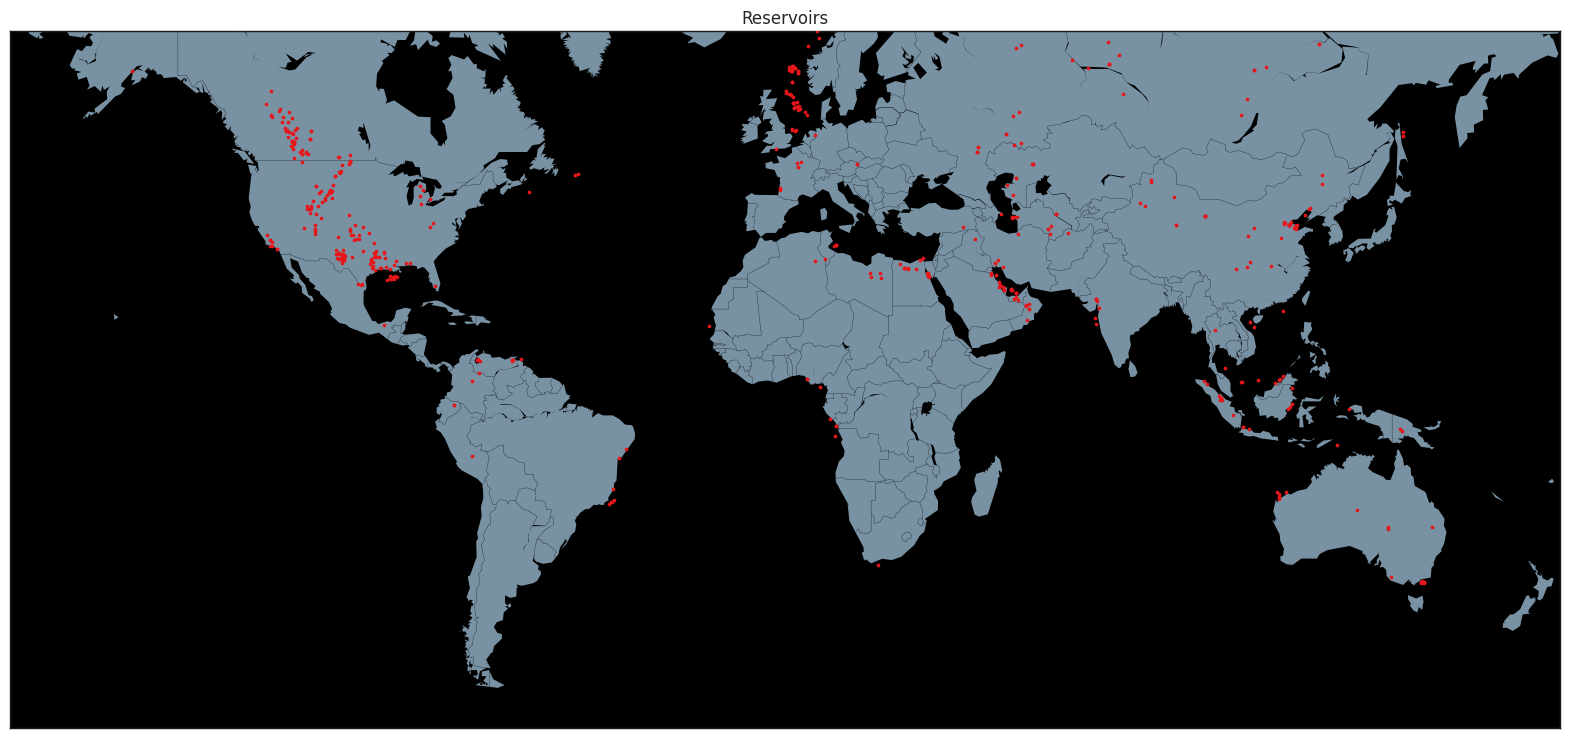

In [23]:
plt.figure(1, figsize=(20, 12))

# Mercator of World
m1 = Basemap(
    projection='merc',
    llcrnrlat=-60,
    urcrnrlat=65,
    llcrnrlon=-180,
    urcrnrlon=180,
    lat_ts=0,
    resolution='c',
)

m1.fillcontinents(color='#7892A4',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.2, color="#000000")        # thin white line for country borders

# Plot the data
mxy = m1(data["Longitude"].tolist(), data["Latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=7, c="#E6171A", lw=0, alpha=1, zorder=5)

plt.title("Reservoirs")
plt.show()

## Категориальные признаки

In [24]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head()

Field_name        Reservoir_unit       Country       Region  \
0            ABQAIQ                ARAB D  SAUDI ARABIA  MIDDLE EAST   
1      ABU GHARADIG              BAHARIYA         EGYPT       AFRICA   
2  ABU MADI-EL QARA   ABU MADI (LEVEL II)         EGYPT       AFRICA   
3  ABU MADI-EL QARA  ABU MADI (LEVEL III)         EGYPT       AFRICA   
4       AL HUWAISAH               SHUAIBA          OMAN  MIDDLE EAST   

     Basin_name Tectonic_regime Operator_company Onshore_or_offshore  \
0      THE GULF     COMPRESSION     SAUDI ARAMCO             ONSHORE   
1  ABU GHARADIG       EXTENSION            GUPCO             ONSHORE   
2    NILE DELTA     STRIKE-SLIP             IEOC             ONSHORE   
3    NILE DELTA     STRIKE-SLIP             IEOC             ONSHORE   
4    FAHUD SALT     COMPRESSION              PDO             ONSHORE   

  Hydrocarbon_type_(main) Reservoir_status_(current) Structural_setting  \
0                     OIL               REJUVENATING           FORELAND   
1          GAS-CONDENSATE          MATURE PRODUCTION               RIFT   
2                     GAS       DECLINING PRODUCTION             WRENCH   
3                     GAS       DECLINING PRODUCTION             WRENCH   
4                     OIL               REJUVENATING               SALT   

  Reservoir_period         Lithology_(main)  
0         JURASSIC                LIMESTONE  
1       CRETACEOUS                SANDSTONE  
2          NEOGENE  THINLY-BEDDED SANDSTONE  
3          NEOGENE                SANDSTONE  
4       CRETACEOUS                LIMESTONE

In [25]:
cat_cols.shape

(442, 13)

In [26]:
cat_cols.describe()

Field_name Reservoir_unit Country         Region      Basin_name  \
count          442            442     442            442             442   
unique         388            353      49              7             116   
top     LAOJUNMIAO          BRENT     USA  NORTH AMERICA  WESTERN CANADA   
freq             3              9     120            171              40   

       Tectonic_regime Operator_company Onshore_or_offshore  \
count              442              442                 442   
unique               9              180                   3   
top        COMPRESSION         NUMEROUS             ONSHORE   
freq               214               39                 307   

       Hydrocarbon_type_(main) Reservoir_status_(current) Structural_setting  \
count                      442                        442                442   
unique                       6                         13                 12   
top                        OIL       DECLINING PRODUCTION           FORELAND   
freq                       332                        131                122   

       Reservoir_period Lithology_(main)  
count               442              442  
unique               15               17  
top          CRETACEOUS        SANDSTONE  
freq                122              248

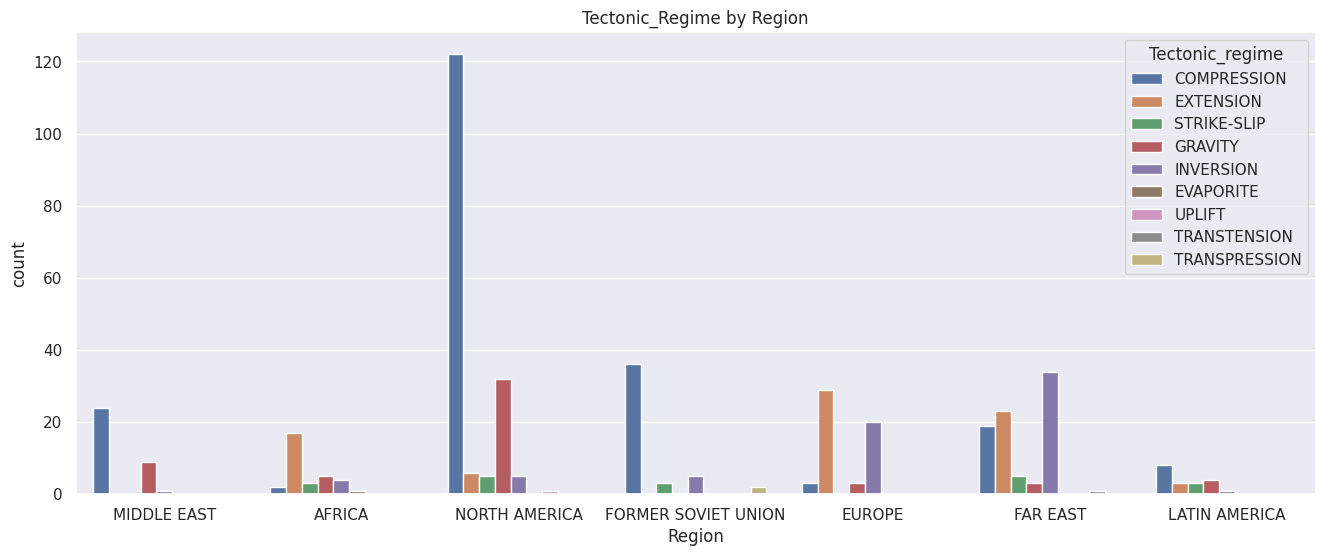

In [27]:
f, ax=plt.subplots(figsize=(16, 6))
sns.countplot(df, x='Region', hue='Tectonic_regime', )
ax.set_title('Tectonic_Regime by Region')
plt.show()

In [28]:
pd.crosstab(df['Region'], df['Tectonic_regime'], margins=True).style.background_gradient(cmap='summer_r')

### Попробуем закодировать категории

In [29]:
NEED_LABEL_ENCODING = True

In [30]:
if NEED_LABEL_ENCODING:
    le = LabelEncoder()
    for c in cat_cols.columns:
        df[c] = le.fit_transform(cat_cols[c])
df.head()

num  Field_name  Reservoir_unit  Country  Region  Basin_name  \
0    6           0              22       35       5          99   
1   10           1              28       12       0           0   
2   11           2               4       12       0          59   
3   12           2               5       12       0          59   
4   20           3             261       30       5          27   

   Tectonic_regime  Latitude  Longitude  Operator_company  ...  \
0                0   26.0800    49.8100               138  ...   
1                2   29.7422    28.4925                61  ...   
2                5   31.4382    31.3616                68  ...   
3                5   31.4382    31.3616                68  ...   
4                0   21.9607    56.0452               109  ...   

   Hydrocarbon_type_(main)  Reservoir_status_(current)  Structural_setting  \
0                        5                           8                   2   
1                        3                           5                   6   
2                        2                           2                  11   
3                        2                           2                  11   
4                        5                           8                   7   

   Depth_(top_reservoir_ft_TVD)  Reservoir_period  Lithology_(main)  \
0                          6050                 5                 9   
1                         10282                 3                11   
2                          9843                 7                15   
3                         10499                 7                11   
4                          4955                 3                 9   

   Thickness_(gross_average_ft)  Thickness_(net_pay_average_ft)  \
0                         250.0                           184.0   
1                         745.0                           144.0   
2                         115.0                            66.0   
3                         509.0                           410.0   
4                         250.0                           100.0   

   Porosity_(matrix_average_%)  Permeability_(air_average_mD)  
0                         21.0                          410.0  
1                         10.0                            8.0  
2                         22.0                          200.0  
3                         20.0                          300.0  
4                         21.0                           60.0  

[5 rows x 21 columns]

In [31]:
df_class = df['Tectonic_regime']

## Зависимость с целевыми переменными

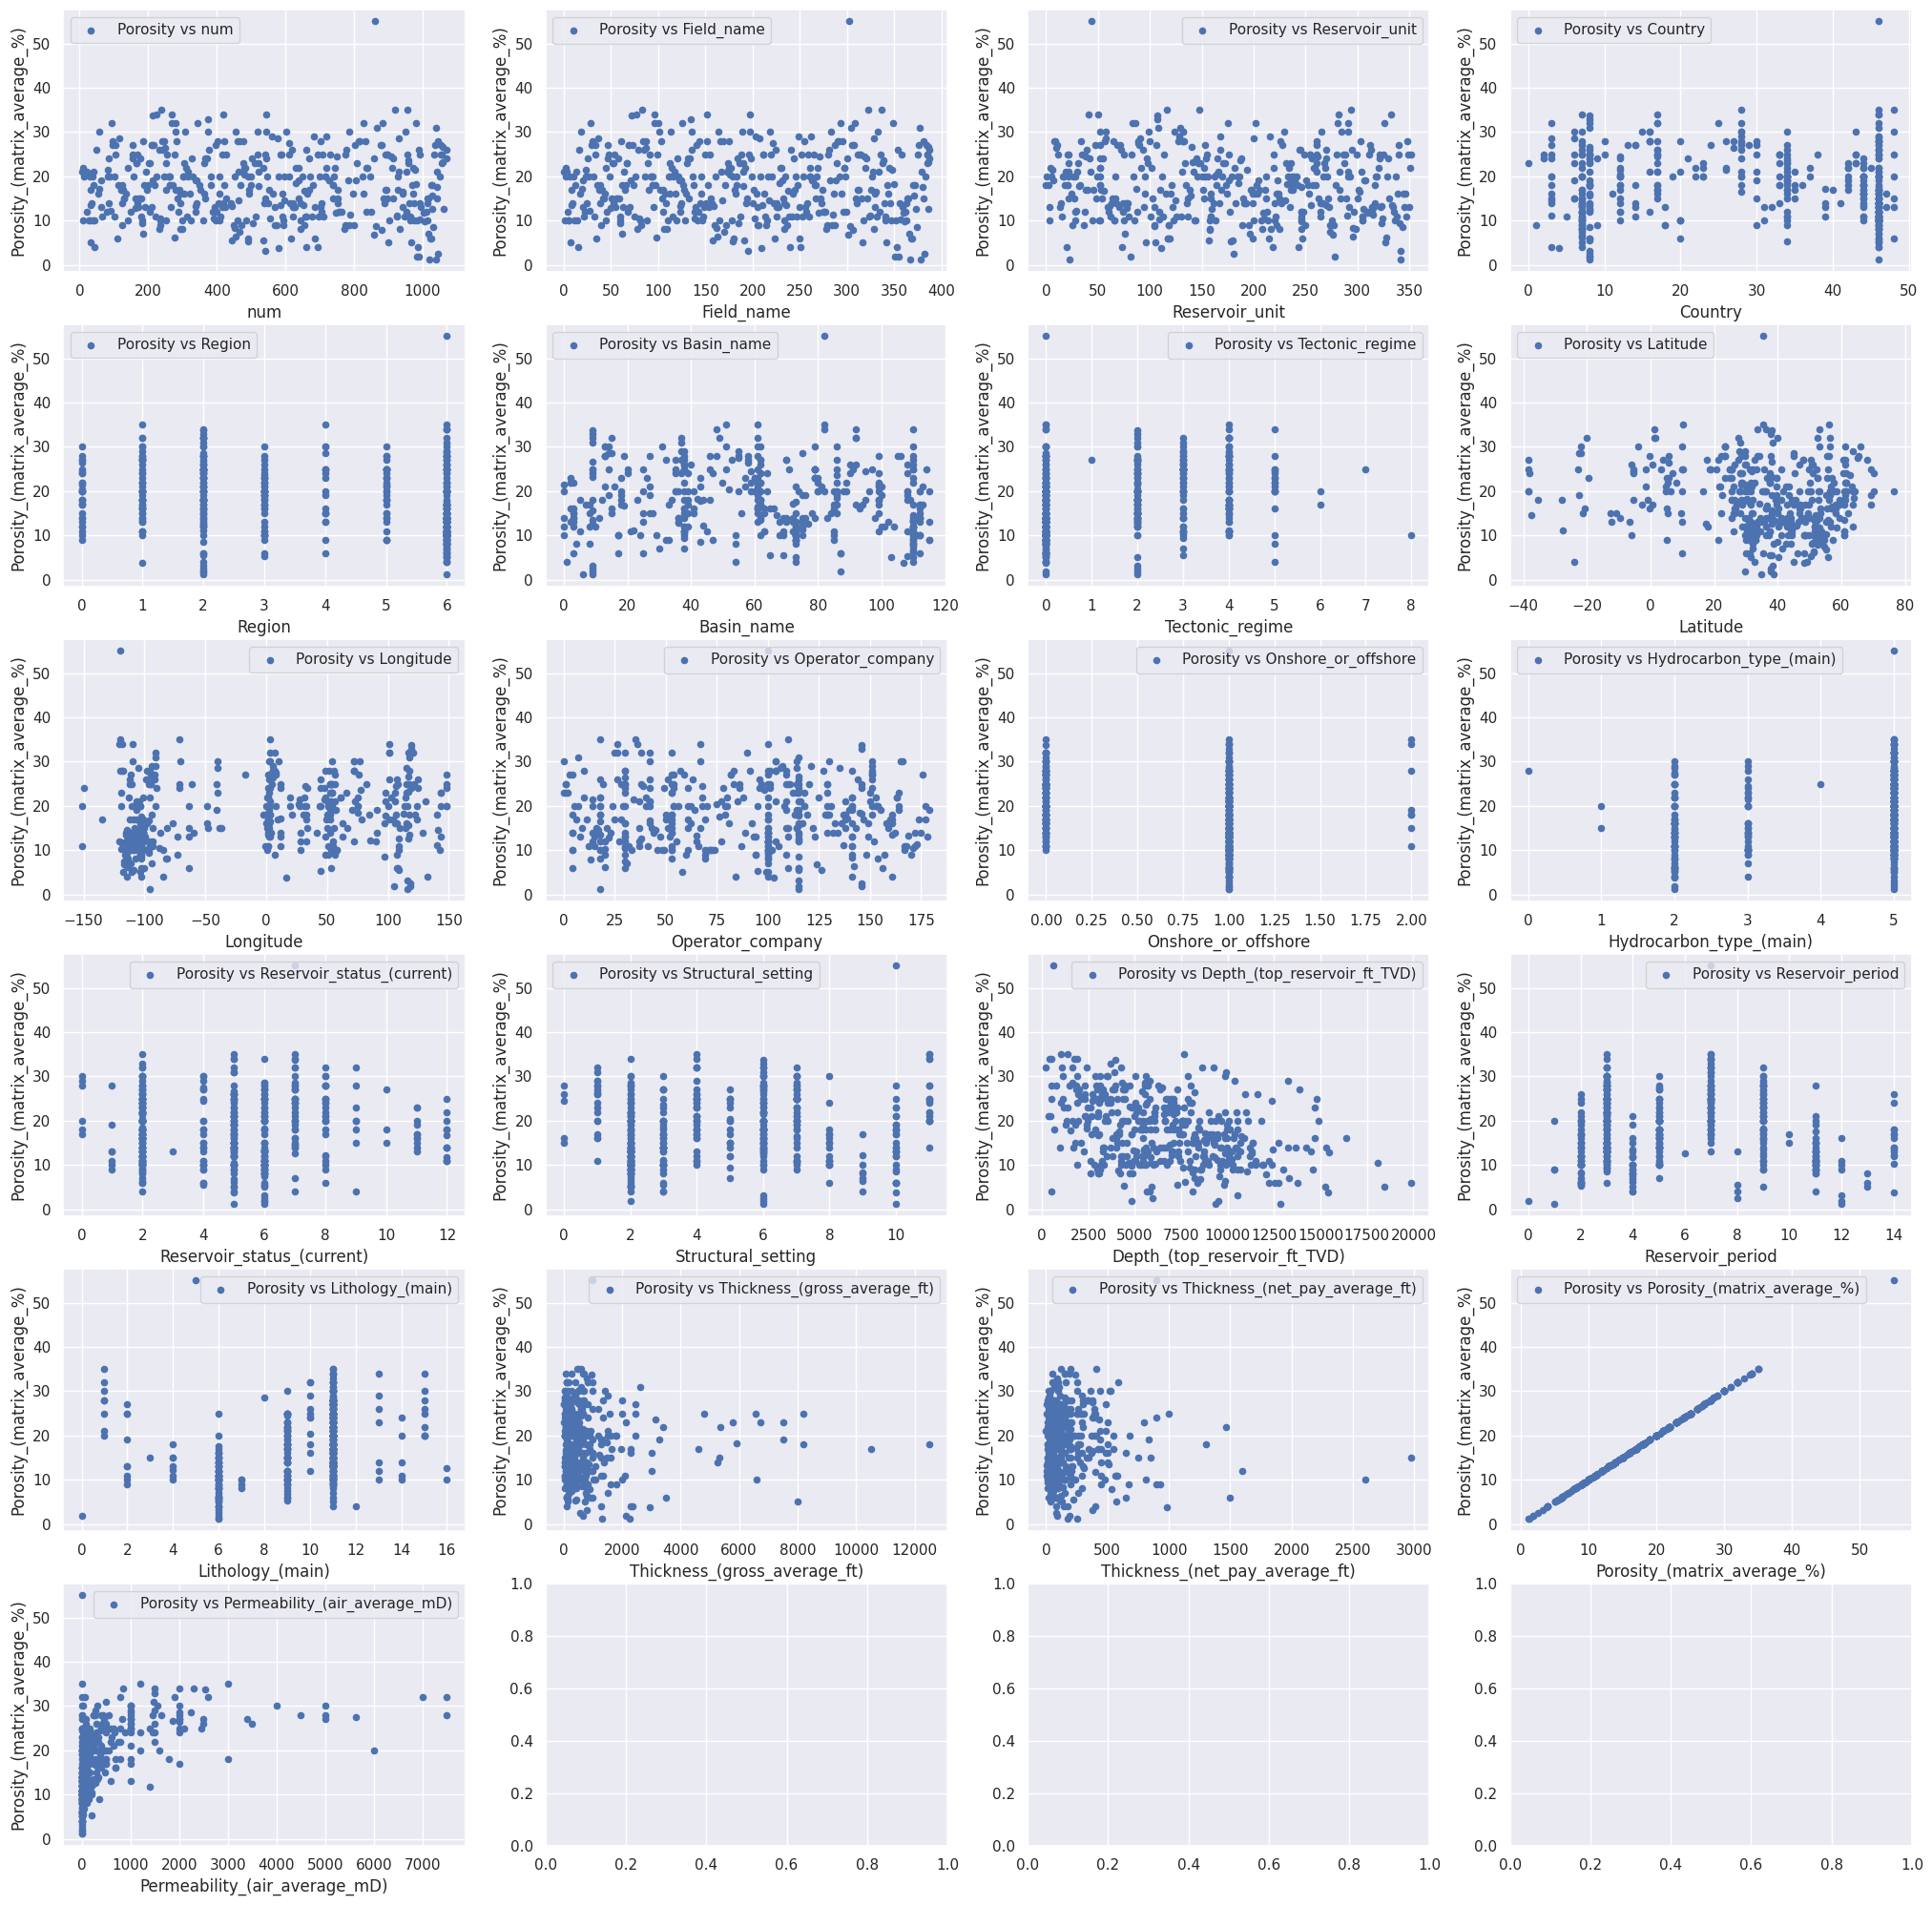

In [32]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(25, 25))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "Porosity_(matrix_average_%)", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4], label=f'Porosity vs {feature}')

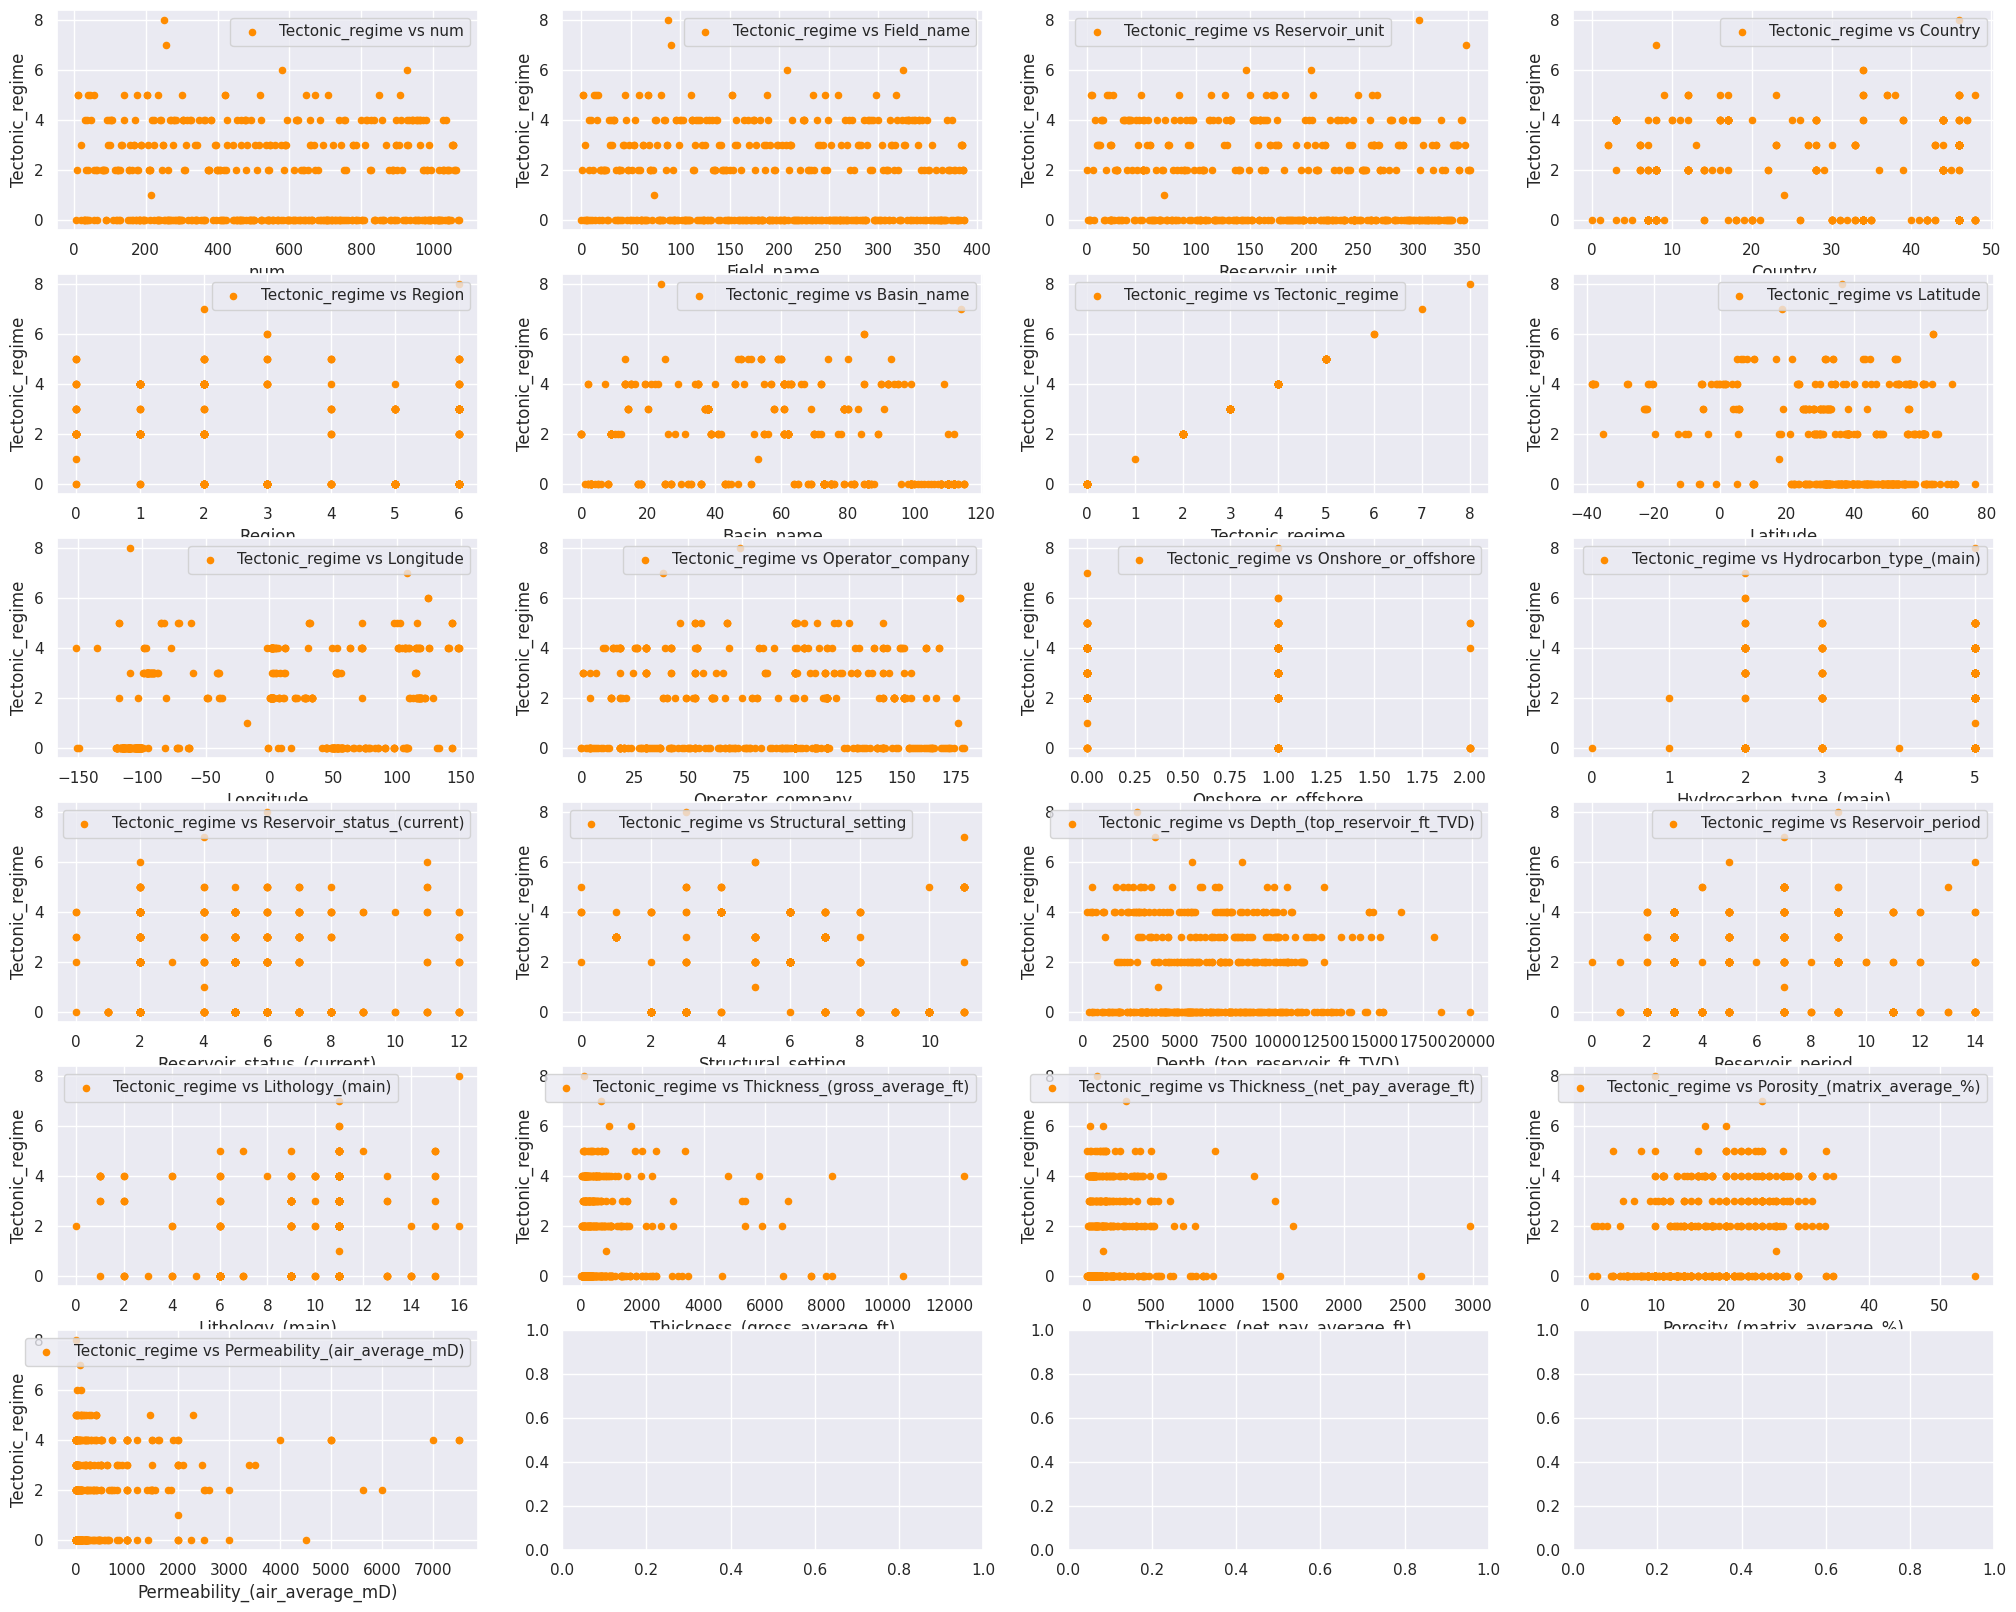

In [33]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "Tectonic_regime", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4], color='darkorange', label=f'Tectonic_regime vs {feature}')

## Выбросы

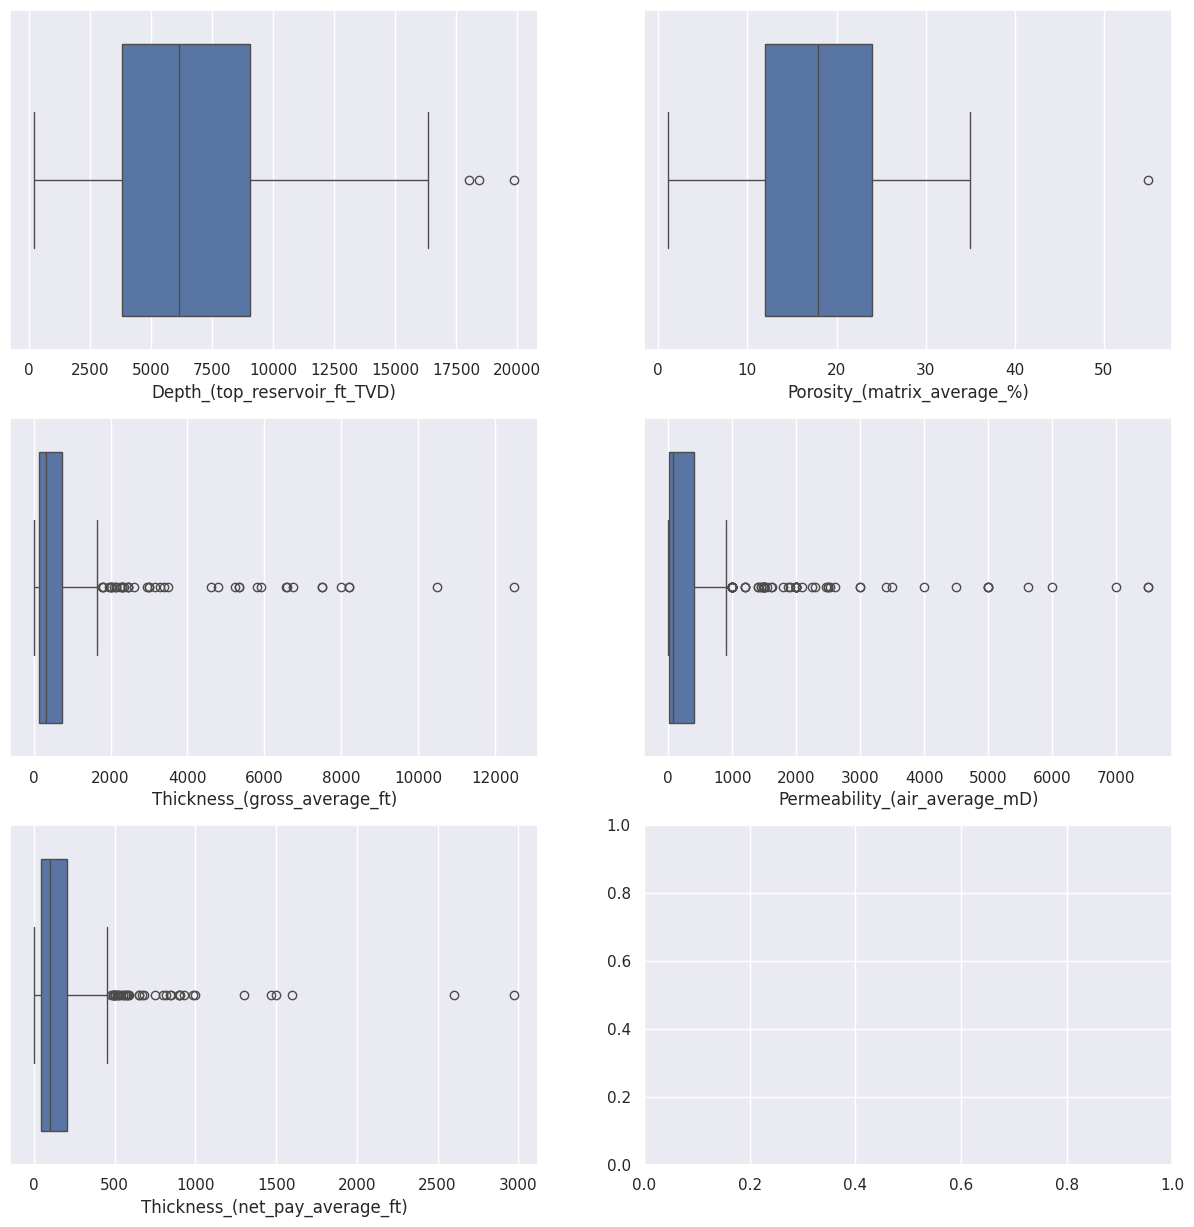

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
count = 0
for idx, feature in enumerate(num_cols.columns[3:]):
    sns.boxplot(x=df[feature], ax=axes[count % 3, count // 3])
    count += 1

In [35]:
for col in num_cols.columns[3:]:
    print(f'Outliers for {col} column: {boxplot_stats(df[col]).pop(0)["fliers"]}\n')

Outliers for Depth_(top_reservoir_ft_TVD) column: [18050 19888 18425]

Outliers for Thickness_(gross_average_ft) column: [ 8000.  2100.  3000.  3400.  8200.  2000.  4600.  7500. 10500.  8200.
  2000.  1800.  3281.  2300.  7500. 12500.  6600.  5800.  5350.  3500.
  2133.  2953.  2460.  5335.  2300.  2460.  2300.  2000.  3000.  1800.
  6739.  1772.  1970.  3150.  5249.  5900.  2350.  2133.  6562.  2250.
  4800.  2460.  2615.]

Outliers for Thickness_(net_pay_average_ft) column: [ 575.  512.  816.  500.  840.  570.  500.  672.  650.  550.  580.  590.
  850.  490.  480.  800.  900.  525. 1300.  679. 2600. 1466. 1500.  928.
  984. 2976.  563.  650. 1000.  750. 1600.  902.  520.  500.  900.  490.
  535.  550.  490.  500.]

Outliers for Porosity_(matrix_average_%) column: [55.]

Outliers for Permeability_(air_average_mD) column: [3000. 5000. 5000. 1000. 2250. 1500. 1000. 1450. 1000. 1000. 1000. 2529.
 2000. 2500. 3000. 1500. 2000. 2000. 6000. 1500. 1900. 2098. 1550. 1200.
 1000. 1000. 1500. 1

## Распределения числовых признаков

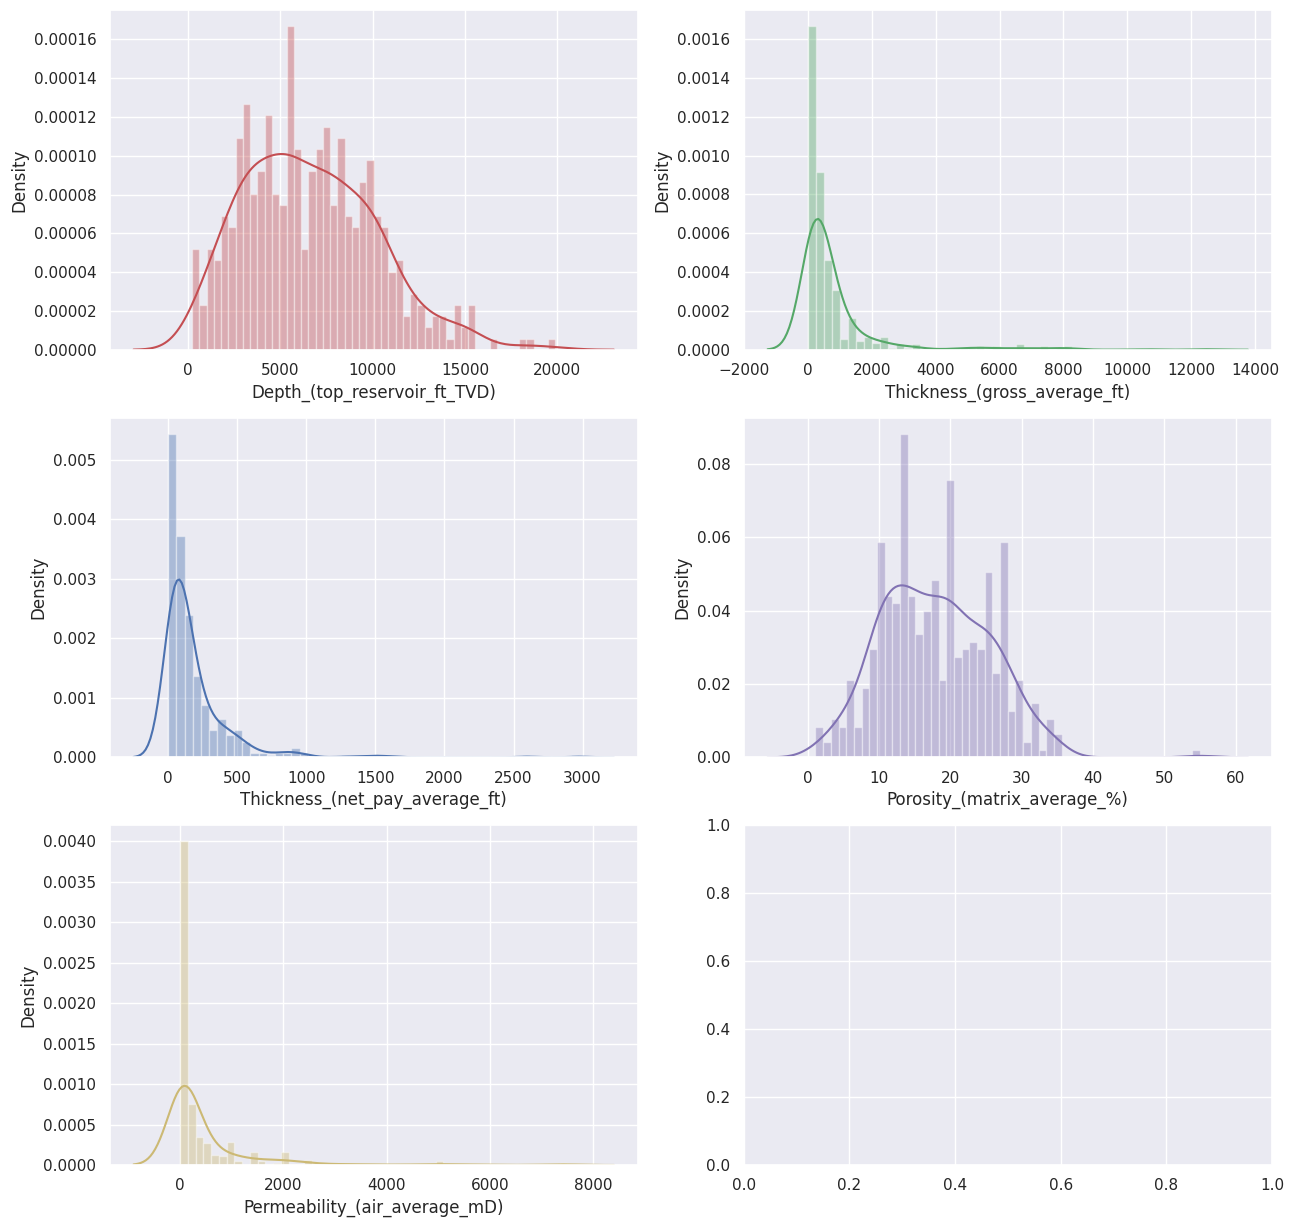

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.distplot(df['Depth_(top_reservoir_ft_TVD)'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(df['Thickness_(gross_average_ft)'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(df['Thickness_(net_pay_average_ft)'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(df['Porosity_(matrix_average_%)'].dropna(), bins=50, color='m', ax=axes[1, 1])
sns.distplot(df['Permeability_(air_average_mD)'], bins=50, color='y', ax=axes[2, 0]);

### Странный объект с аномальной пористостью

In [37]:
data[data['Porosity_(matrix_average_%)'] > 50]

num      Field_name                           Reservoir_unit Country  \
401  861  SOUTH BELRIDGE  BELRIDGE DIATOMITE (MONTEREY-ETCHEGOIN)     USA   

            Region   Basin_name Tectonic_regime  Latitude  Longitude  \
401  NORTH AMERICA  SAN JOAQUIN     COMPRESSION   35.4368  -119.6788   

    Operator_company  ... Hydrocarbon_type_(main) Reservoir_status_(current)  \
401         NUMEROUS  ...                     OIL         PLATEAU PRODUCTION   

    Structural_setting Depth_(top_reservoir_ft_TVD)  Reservoir_period  \
401             THRUST                          600           NEOGENE   

    Lithology_(main) Thickness_(gross_average_ft)  \
401        DIATOMITE                       1000.0   

     Thickness_(net_pay_average_ft)  Porosity_(matrix_average_%)  \
401                           900.0                         55.0   

     Permeability_(air_average_mD)  
401                            1.5  

[1 rows x 21 columns]

## Ковариация

**Ковариация** (covariance) измеряет направление изменения двух переменных. Другими словами она позволяет понять, как изменится одна из двух переменных при изменении второй.

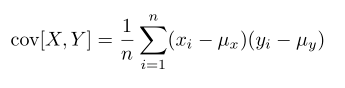

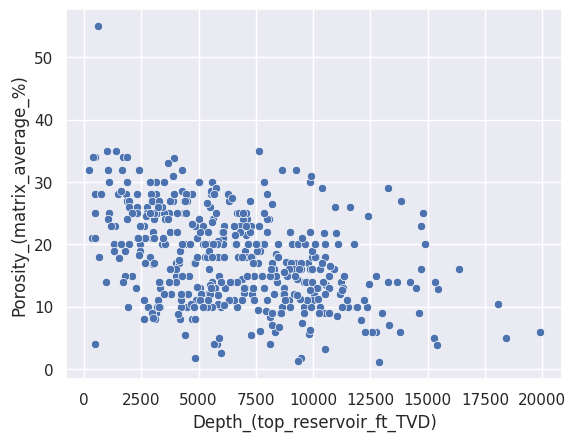

In [38]:
sns.scatterplot(x="Depth_(top_reservoir_ft_TVD)", y="Porosity_(matrix_average_%)", data=df);

In [39]:
df[["Depth_(top_reservoir_ft_TVD)", "Porosity_(matrix_average_%)"]].cov(ddof=1)

Depth_(top_reservoir_ft_TVD)  \
Depth_(top_reservoir_ft_TVD)                  1.276253e+07   
Porosity_(matrix_average_%)                  -1.085292e+04   

                              Porosity_(matrix_average_%)  
Depth_(top_reservoir_ft_TVD)                -10852.923213  
Porosity_(matrix_average_%)                     57.066738

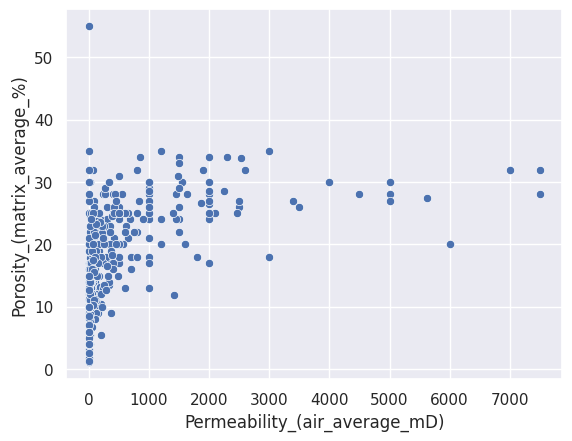

In [40]:
sns.scatterplot(x="Permeability_(air_average_mD)", y="Porosity_(matrix_average_%)", data=df);

In [41]:
df[["Permeability_(air_average_mD)", "Porosity_(matrix_average_%)"]].cov(ddof=1)

Permeability_(air_average_mD)  \
Permeability_(air_average_mD)                   1.034454e+06   
Porosity_(matrix_average_%)                     3.640723e+03   

                               Porosity_(matrix_average_%)  
Permeability_(air_average_mD)                  3640.723210  
Porosity_(matrix_average_%)                      57.066738

Ковариация измеряет только направление, но не силу взаимосвязи

## Корреляция

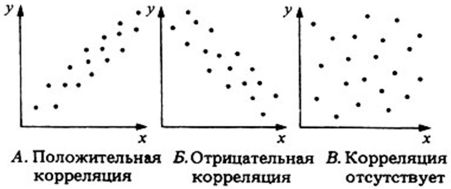

### Корреляция Пирсона

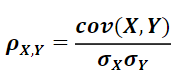

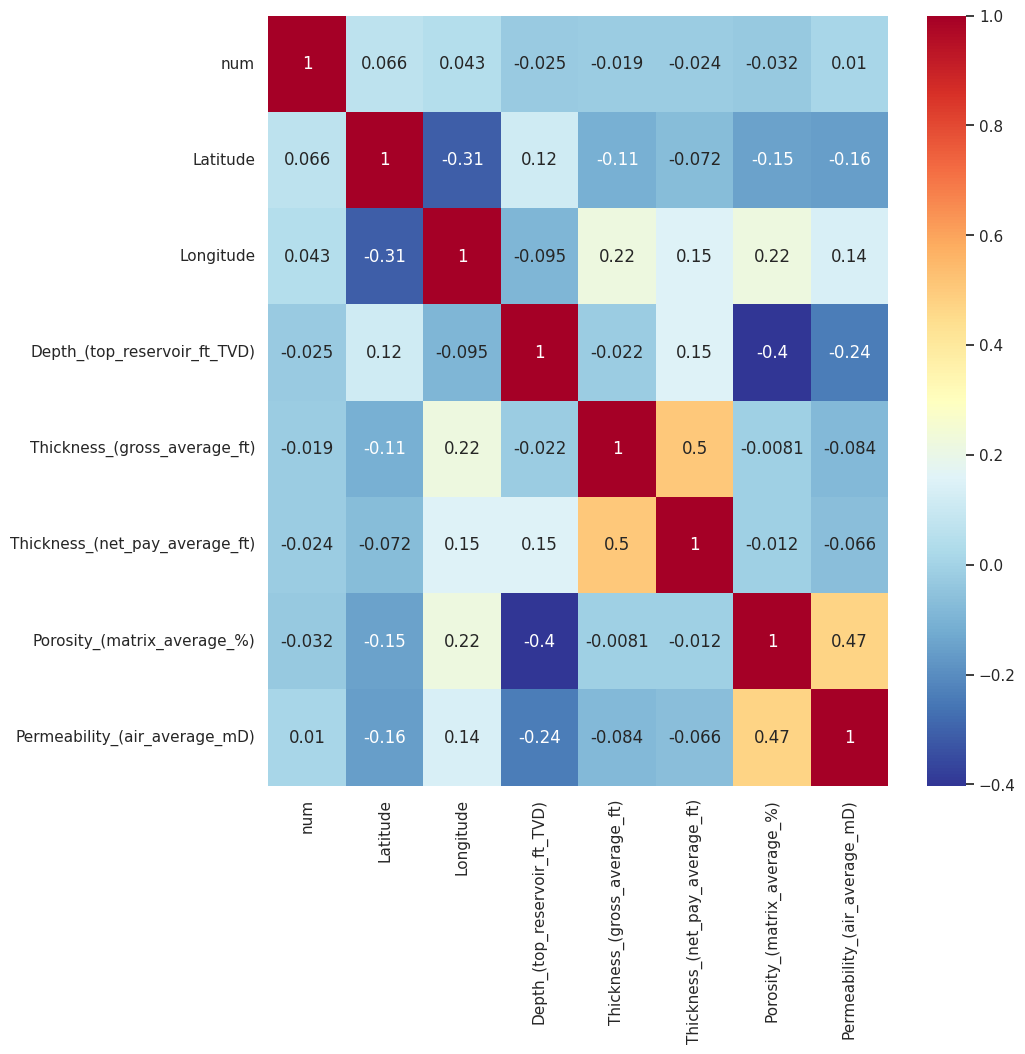

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(num_cols.corr(), cmap="RdYlBu_r", annot=True);

 * Ни ковариация, ни корреляция не устанавливают причинно-следственной связи
 * Коэффициент корреляции Пирсона измеряет взаимосвязь количественных переменных и предполагает, что обе переменные имеют нормальное распределение
 * Отсутствие линейной корреляции не означает отсутствие взаимосвязи. Возможно взаимосвязь есть, но она нелинейна
 * На коэффициент корреляции существенное влияние оказывают выбросы


### Коэффициент ранговой корреляции Спирмена

Коэффициенты Спирмена называются ранговыми, так как при их расчете анализируются не сами значения параметров, а их взаимное расположение – ранги. В этом случае параметры, между которыми рассчитывается взаимосвязи, не должны быть распределения по нормальному закону

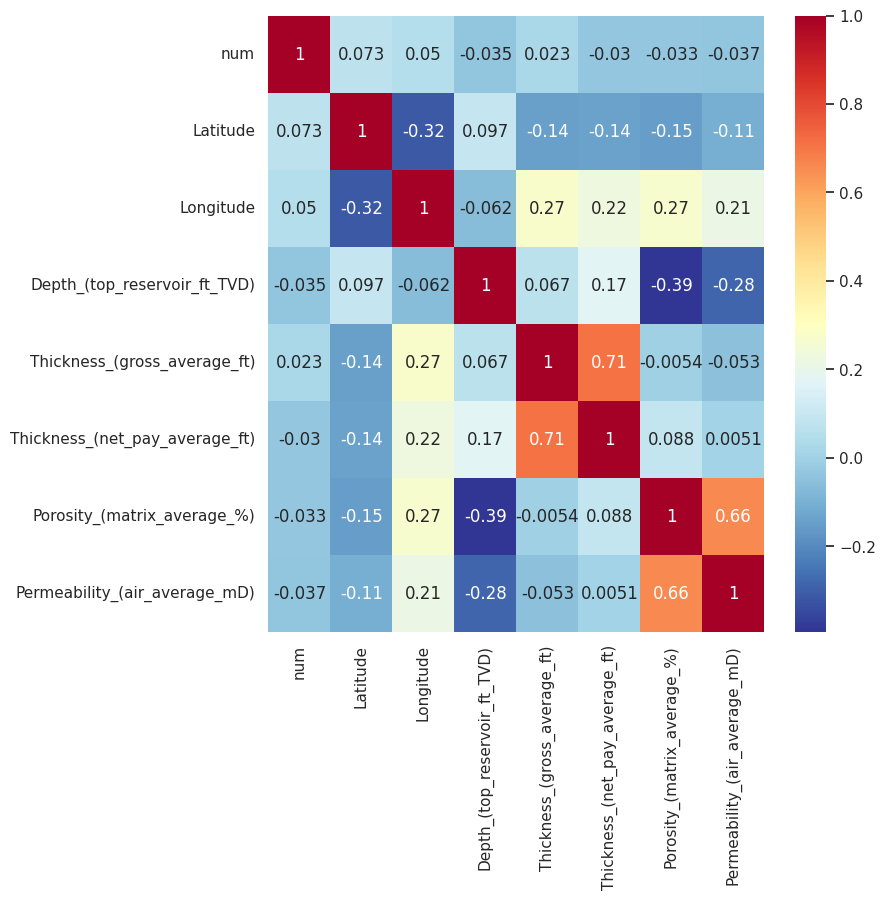

In [43]:
plt.figure(figsize=(8, 8))
sns.heatmap(num_cols.corr(method='spearman'), cmap="RdYlBu_r", annot=True);

### Phik

[repo](https://github.com/KaveIO/PhiK)

interval columns not set, guessing: ['num', 'Latitude', 'Longitude', 'Depth_(top_reservoir_ft_TVD)', 'Thickness_(gross_average_ft)', 'Thickness_(net_pay_average_ft)', 'Porosity_(matrix_average_%)', 'Permeability_(air_average_mD)']


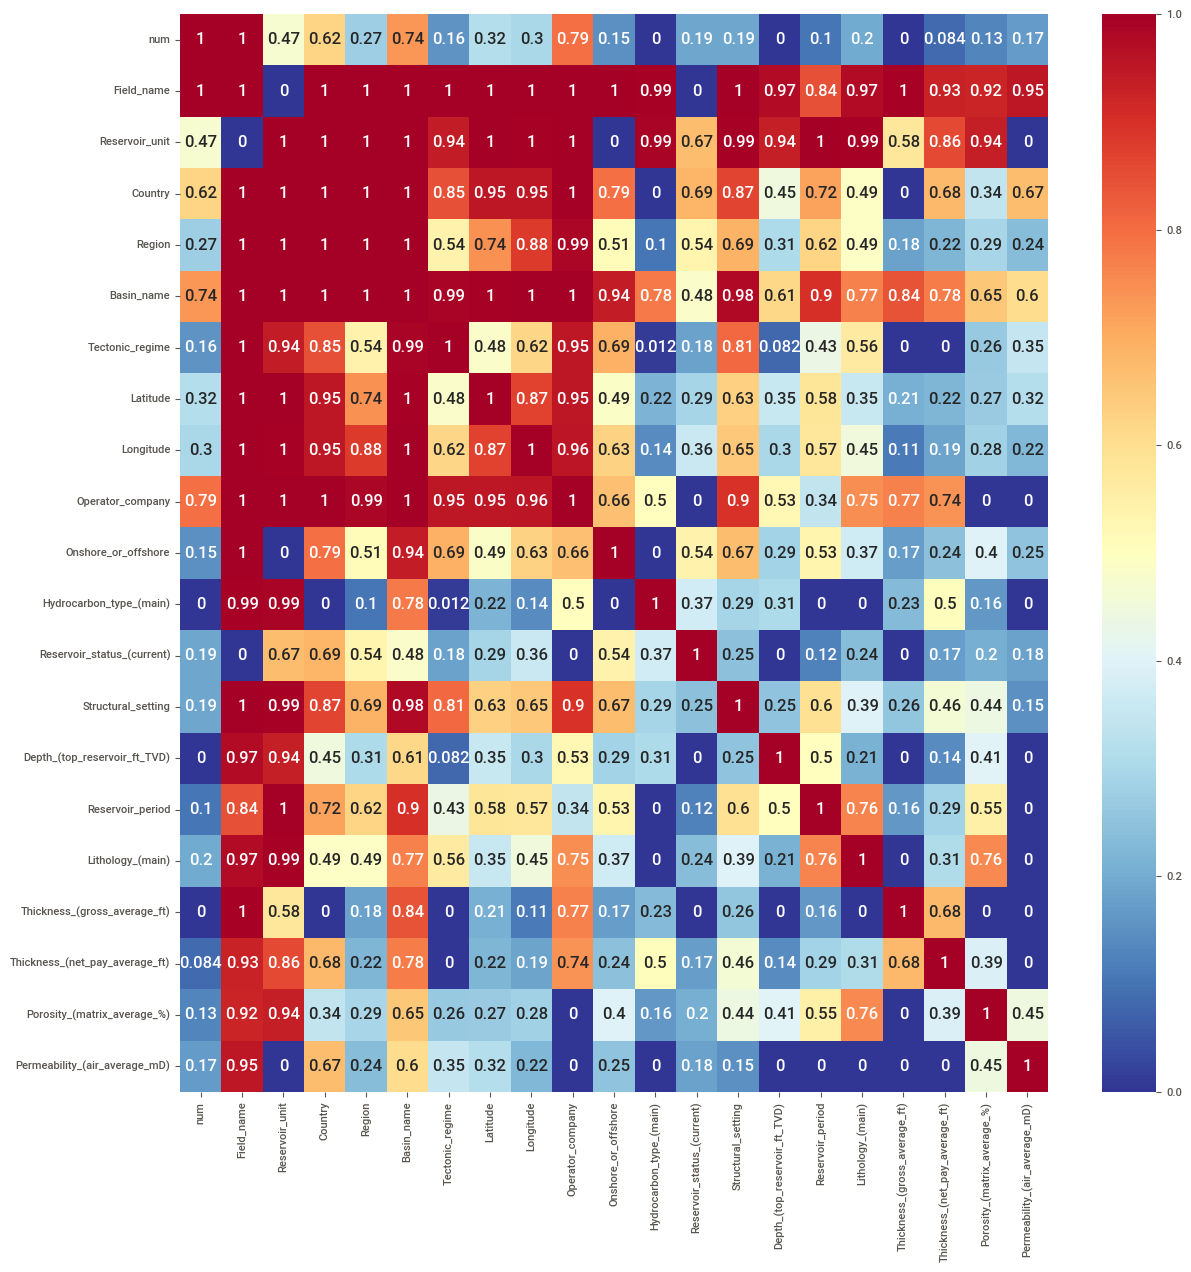

In [49]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.phik_matrix(), cmap="RdYlBu_r", annot=True);

## PCA(n_components=3)

In [ ]:
num_cols.head()

num  Latitude  Longitude  Depth_(top_reservoir_ft_TVD)  \
0    6   26.0800    49.8100                          6050   
1   10   29.7422    28.4925                         10282   
2   11   31.4382    31.3616                          9843   
3   12   31.4382    31.3616                         10499   
4   20   21.9607    56.0452                          4955   

   Thickness_(gross_average_ft)  Thickness_(net_pay_average_ft)  \
0                         250.0                           184.0   
1                         745.0                           144.0   
2                         115.0                            66.0   
3                         509.0                           410.0   
4                         250.0                           100.0   

   Porosity_(matrix_average_%)  Permeability_(air_average_mD)  
0                         21.0                          410.0  
1                         10.0                            8.0  
2                         22.0                          200.0  
3                         20.0                          300.0  
4                         21.0                           60.0

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(num_cols)
df_scaled[:5]

array([[-1.69475241, -0.41205449,  0.66246334, -0.15795719, -0.37088264,
        -0.01796023,  0.40686009, -0.05897692],
       [-1.68195626, -0.24434978,  0.4196457 ,  1.02800026, -0.02743471,
        -0.15988376, -1.05092331, -0.45467343],
       [-1.67875722, -0.16668412,  0.45232627,  0.90497679, -0.46455026,
        -0.43663466,  0.53938586, -0.26568405],
       [-1.67555818, -0.16668412,  0.45232627,  1.0888114 , -0.19117958,
         0.78390774,  0.27433433, -0.16725208],
       [-1.64996587, -0.60069138,  0.73348558, -0.46481528, -0.37088264,
        -0.31599965,  0.40686009, -0.40348881]])

In [ ]:
df_scaled.shape

(442, 8)

In [ ]:
model = PCA(n_components=3)
model.fit(df_scaled)
df_pca_3 = model.transform(df_scaled)

In [ ]:
def draw_3d(data):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    for f in data:
        ax.scatter(f[0], f[1], f[2], c='b')
    plt.show()

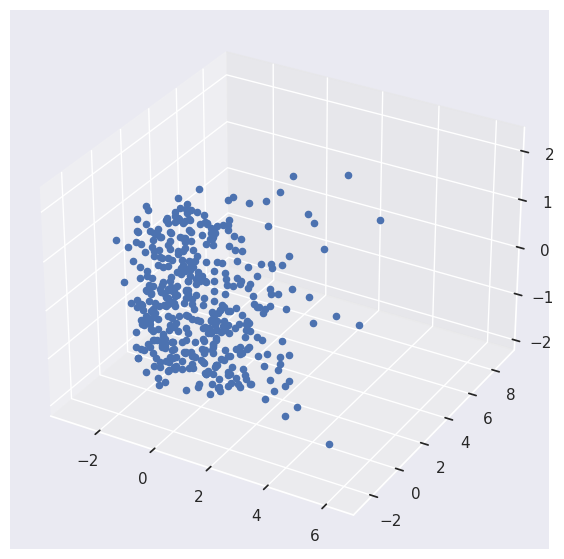

In [ ]:
draw_3d(df_pca_3)

## Визуализация классов и PCA

In [ ]:
model = PCA(n_components=2)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[ 0.64380066,  0.02693248],
       [-0.9733672 ,  0.60194191],
       [-0.02737344, -0.150259  ],
       [-0.1271356 ,  0.83047702],
       [ 0.69211455, -0.09424083]])

In [ ]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

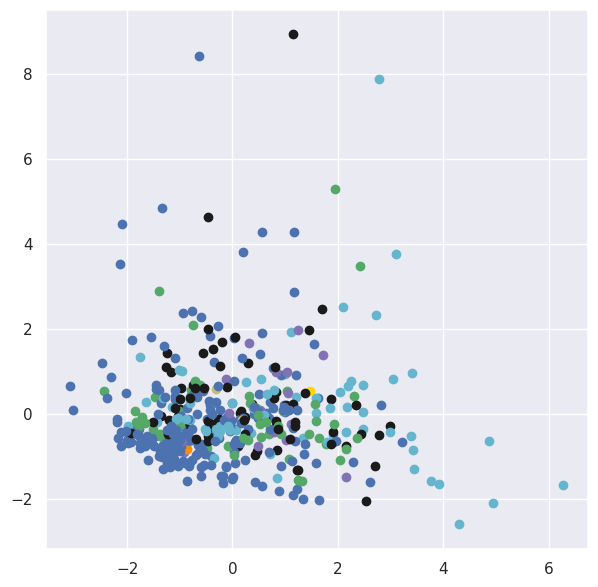

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], c=colors[int(f[1]['class'])])

plt.show()

3D

In [ ]:
model = PCA(n_components=3)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[ 0.64380066,  0.02693248, -1.66949134],
       [-0.9733672 ,  0.60194191, -1.74786868],
       [-0.02737344, -0.150259  , -1.75611042],
       [-0.1271356 ,  0.83047702, -1.69210776],
       [ 0.69211455, -0.09424083, -1.6512661 ]])

In [ ]:
# %matplotlib notebook
# from mpl_toolkits.mplot3d import axes3d

In [ ]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
    'pca3': pca_coords[:, 2],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

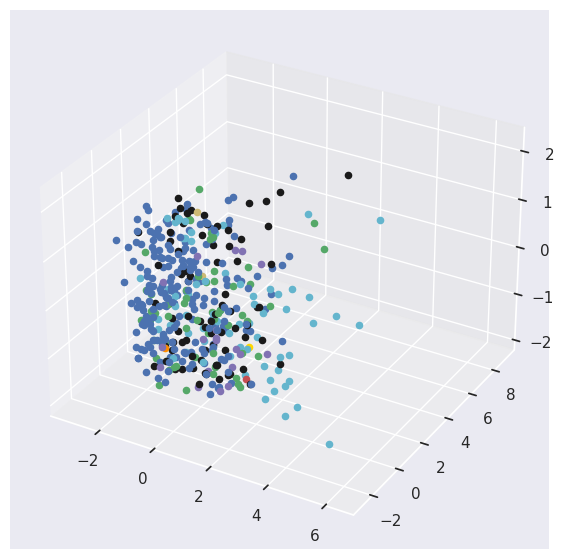

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], f[1]['pca3'], c=colors[int(f[1]['class'])])
plt.show()

## Sweetviz

In [44]:
np.VisibleDeprecationWarning

numpy.exceptions.VisibleDeprecationWarning

In [45]:
comparison = sv.compare(train, test)

                                             |          | [  0%]   00:00 -> (? left)


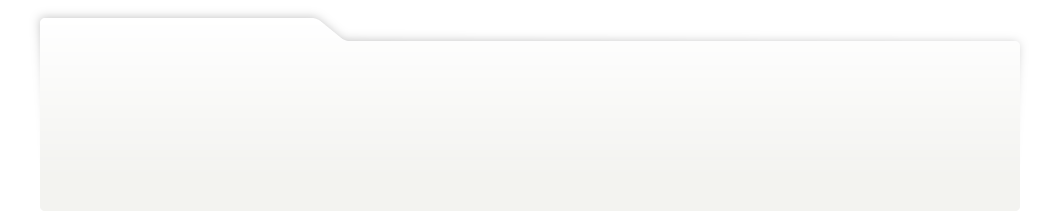
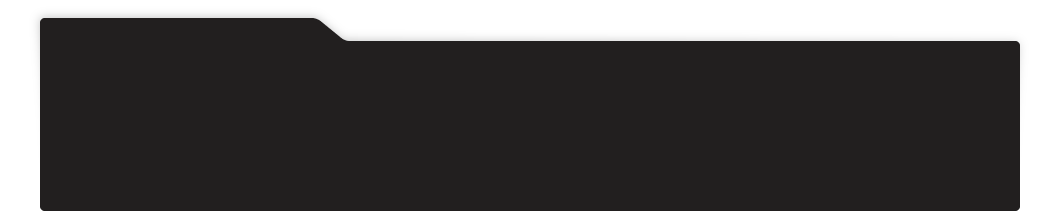
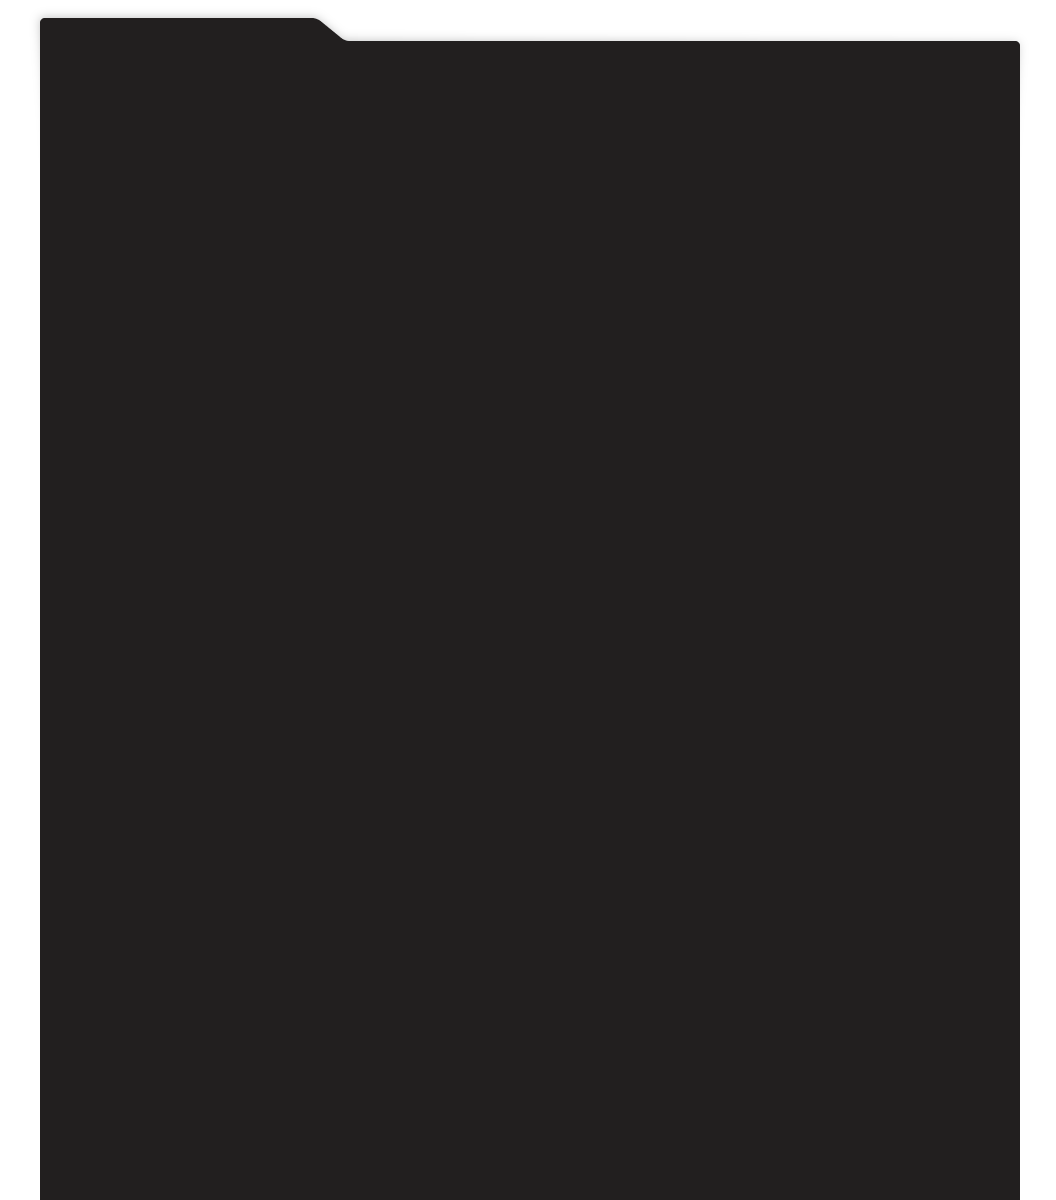
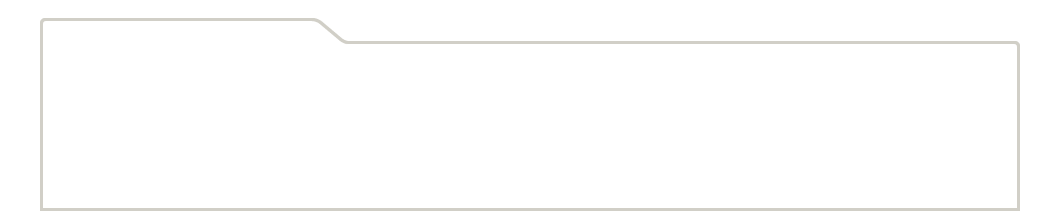
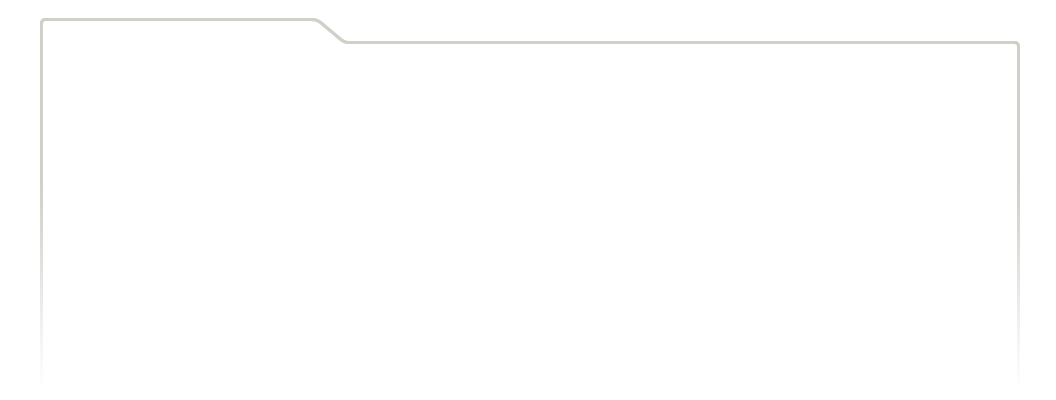
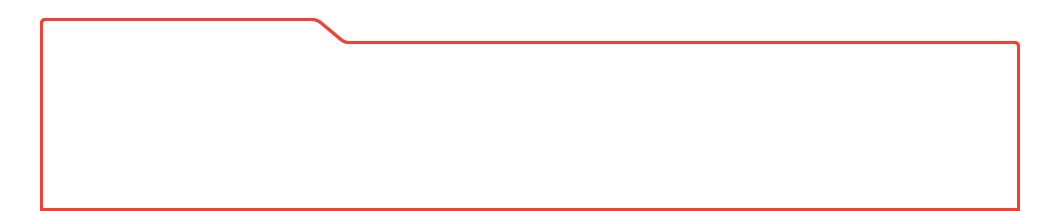
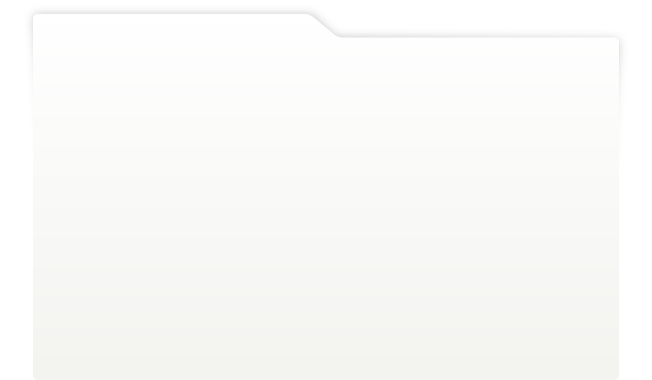
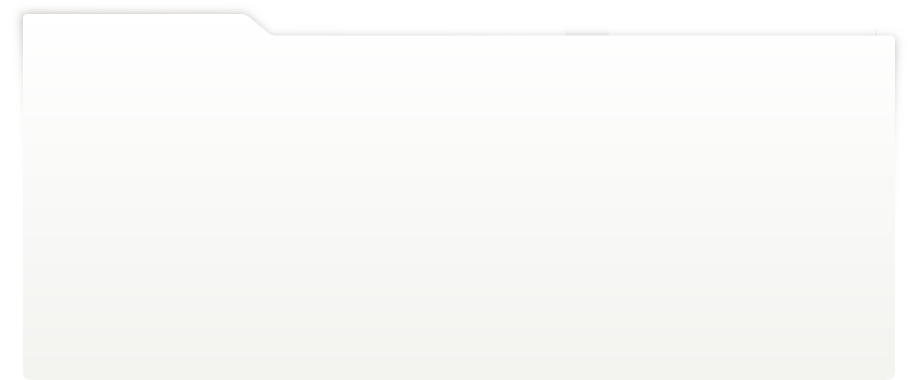
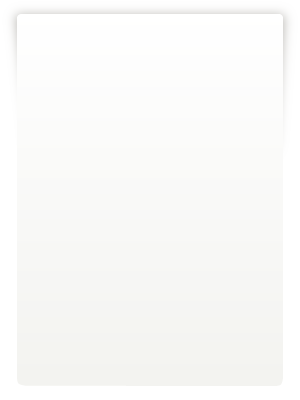
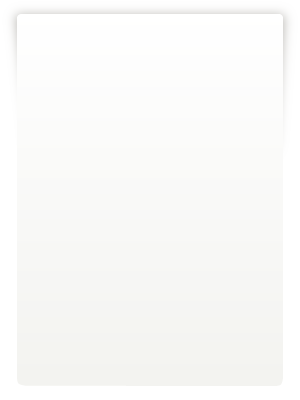
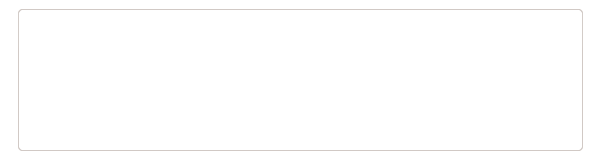
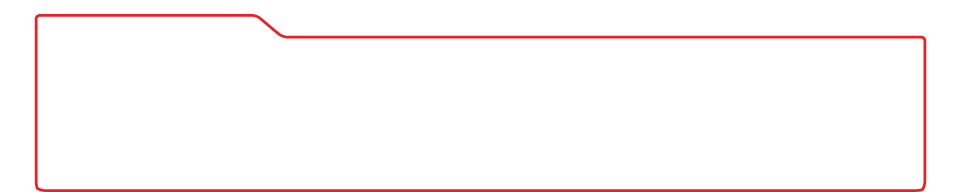
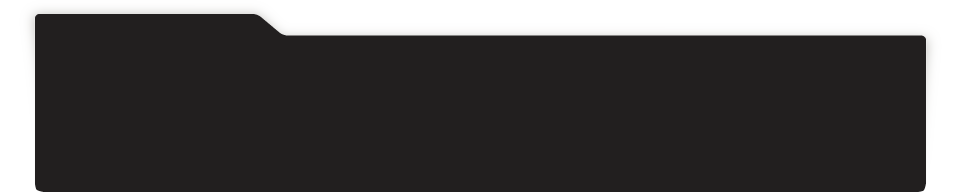
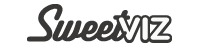
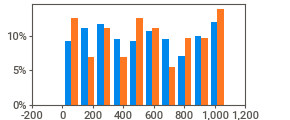
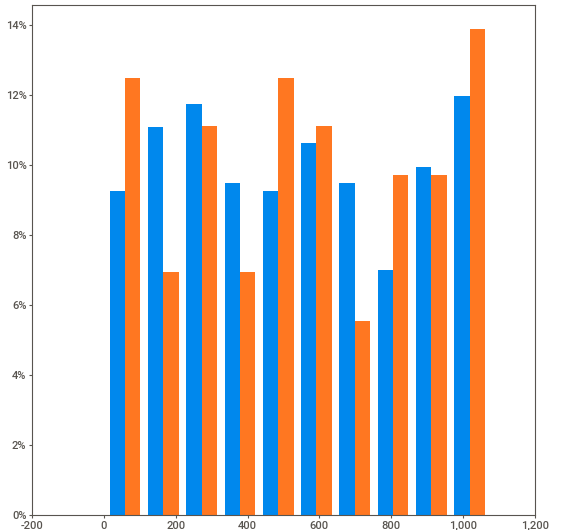
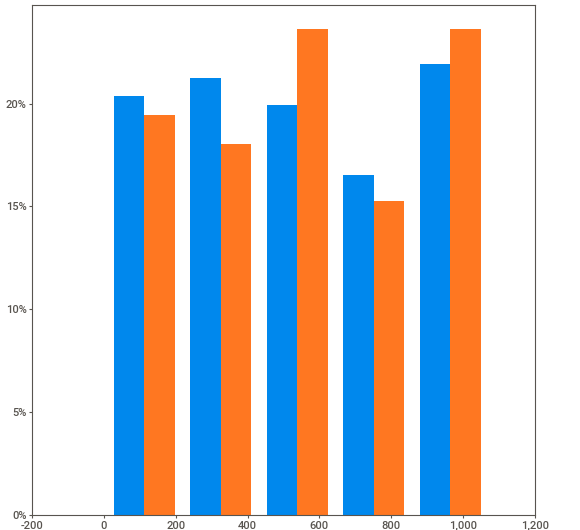
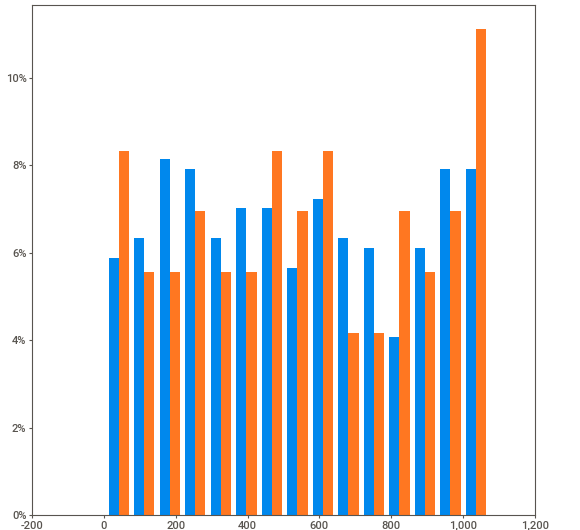
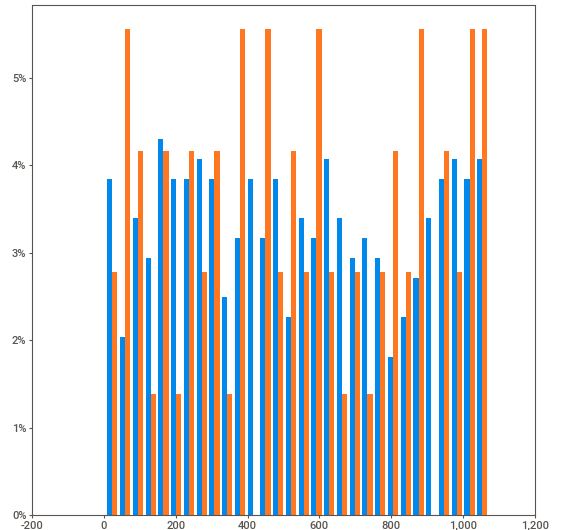
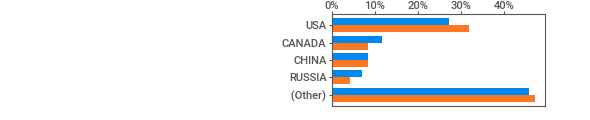
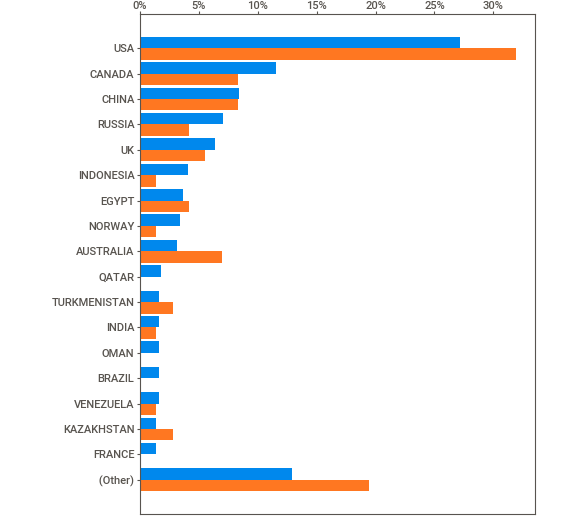
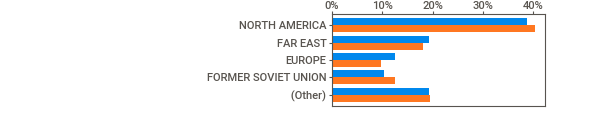
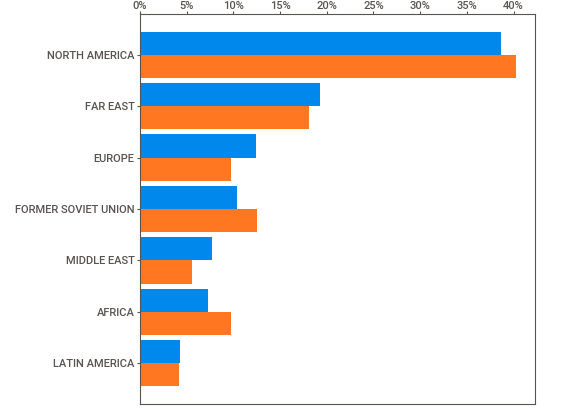
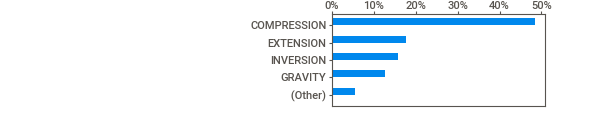
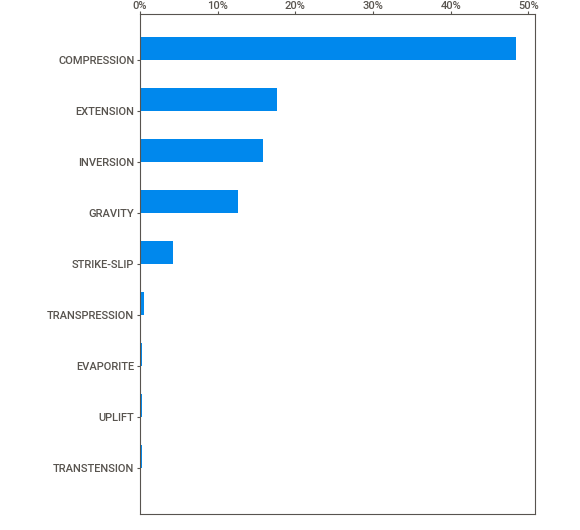
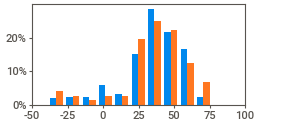
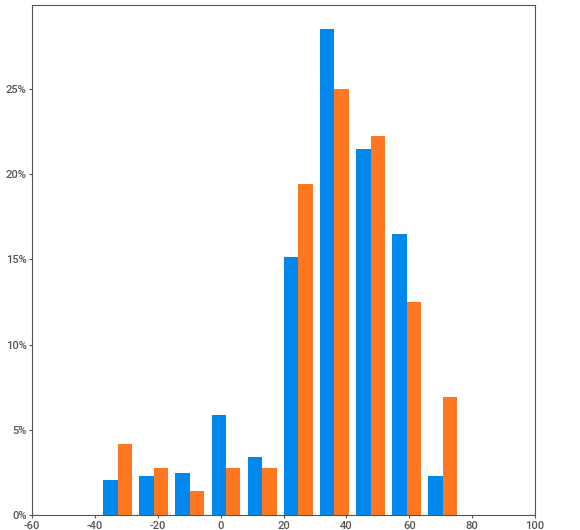
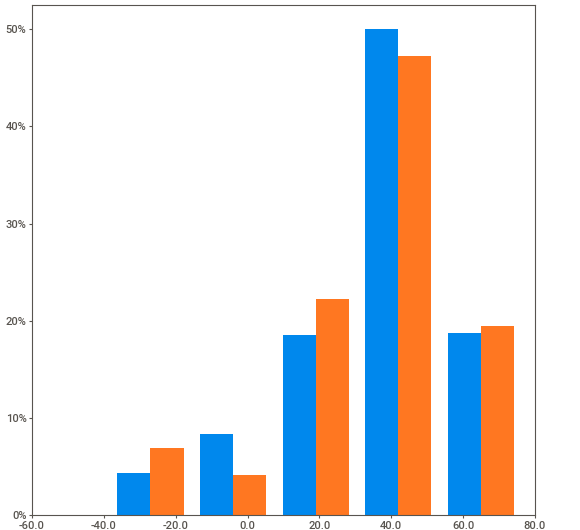
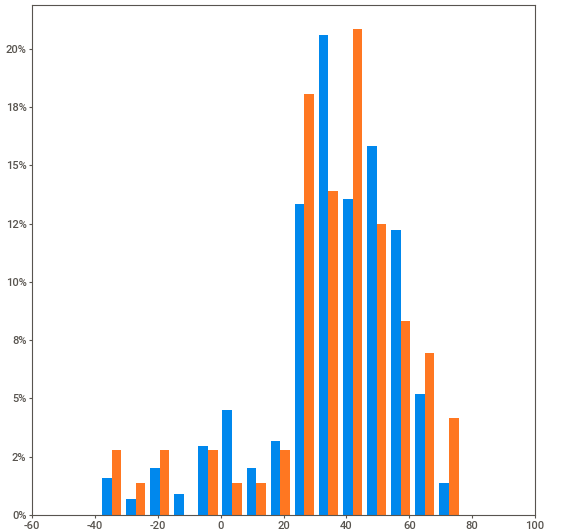
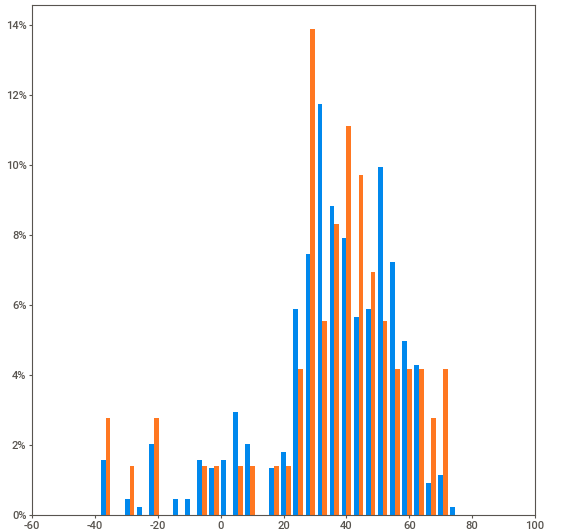
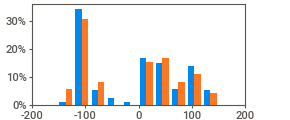
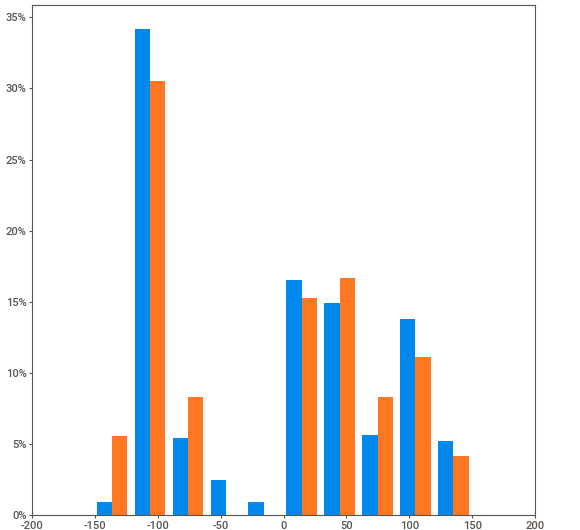
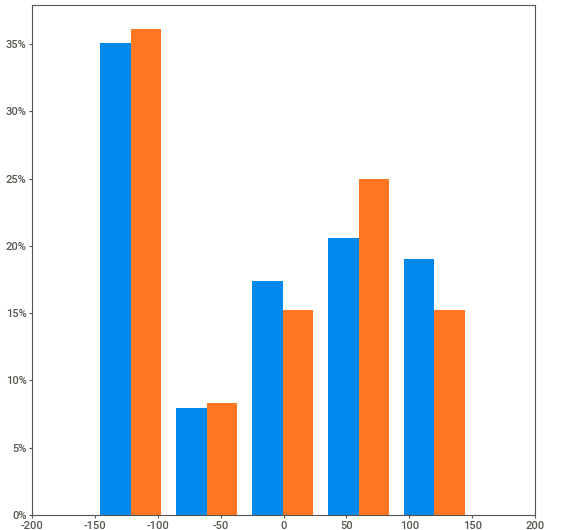
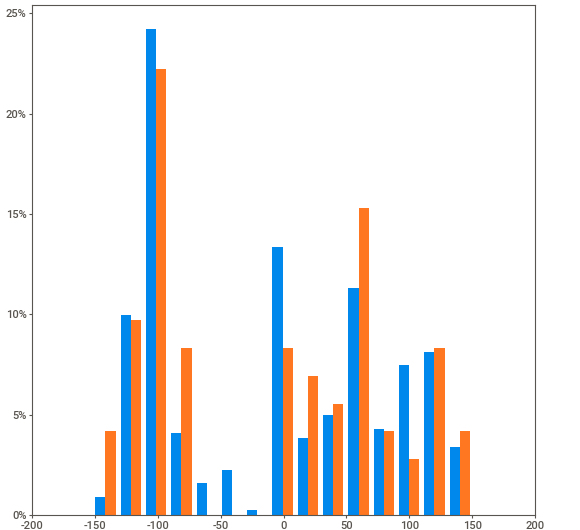
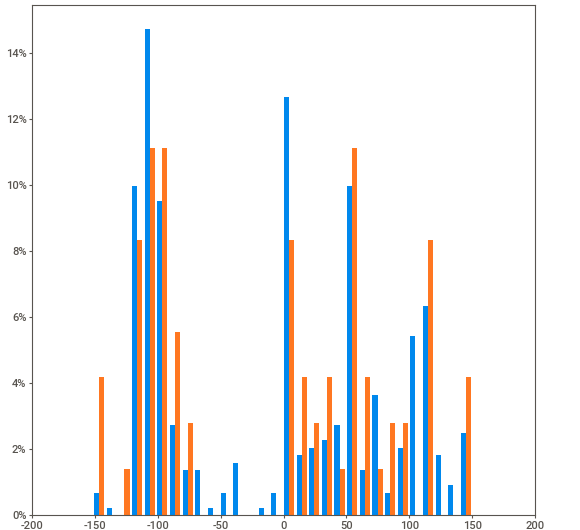
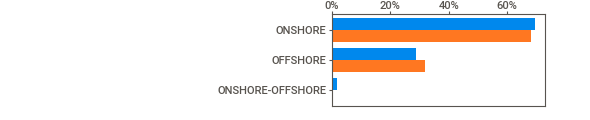
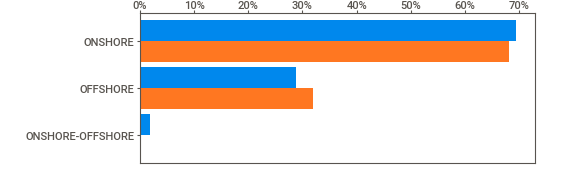
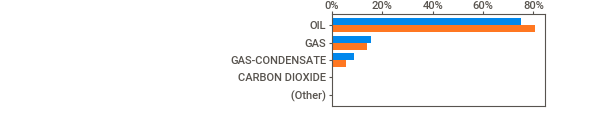
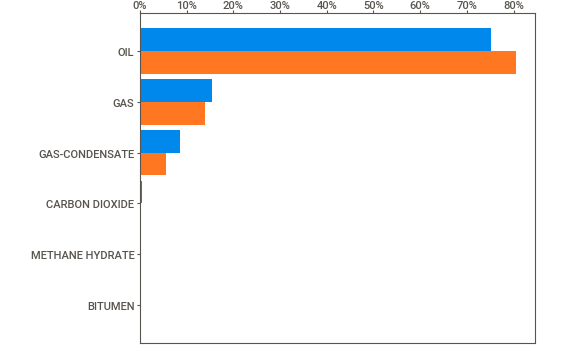
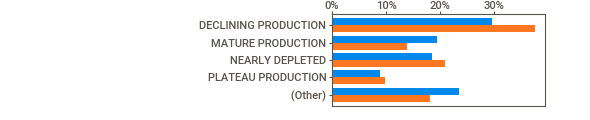
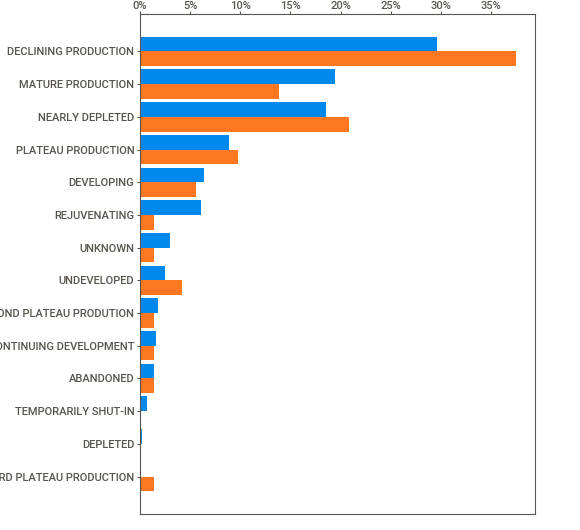
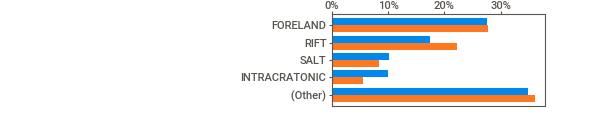
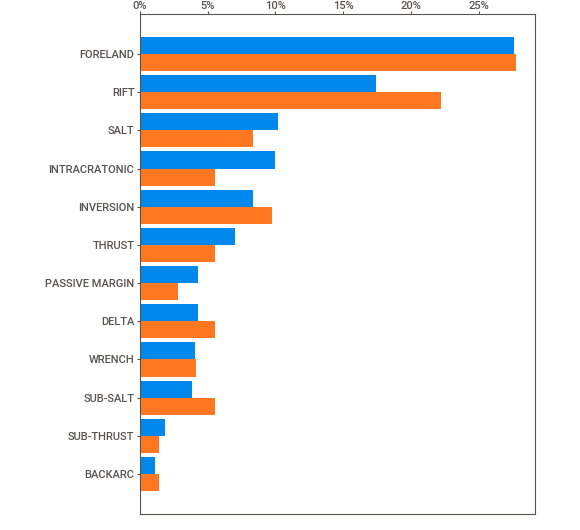
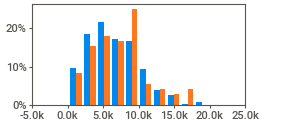
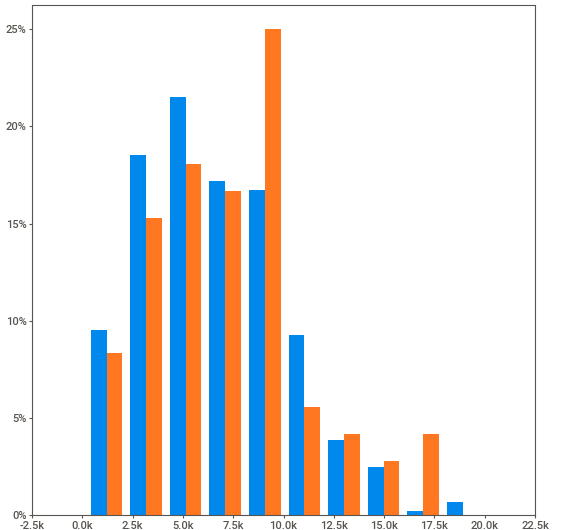
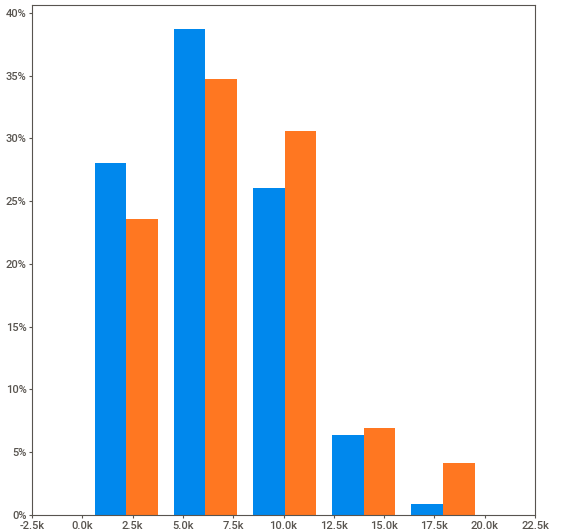
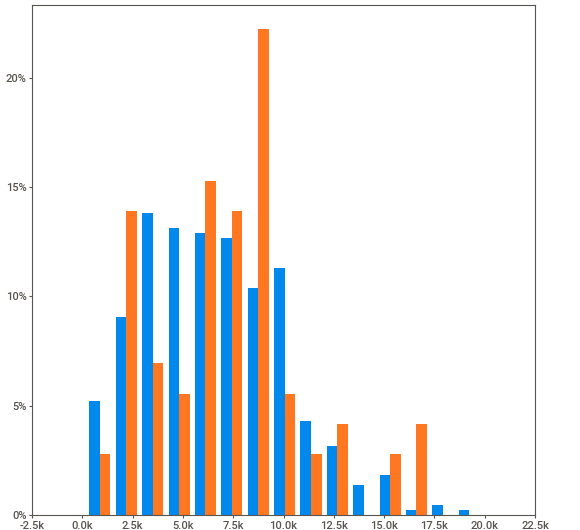
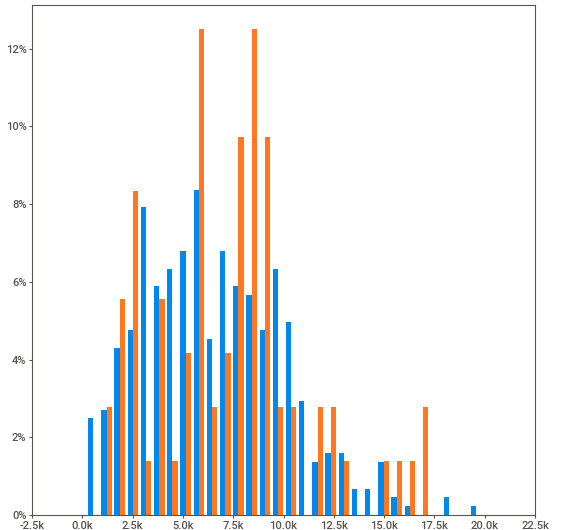
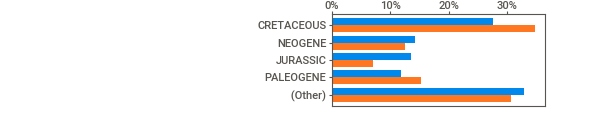
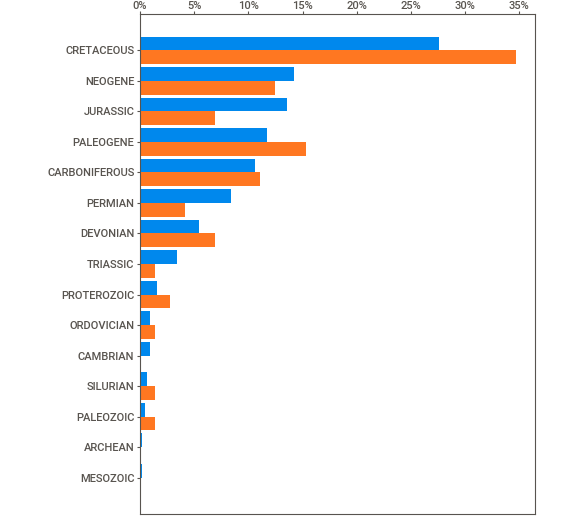
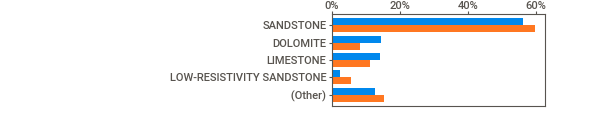
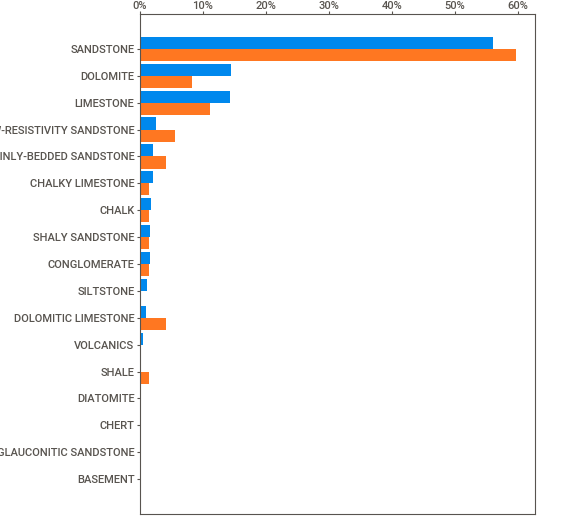
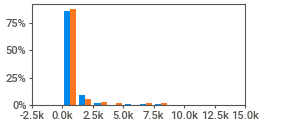
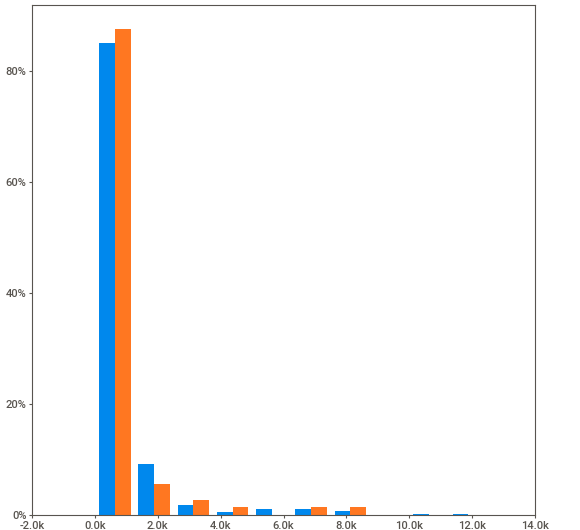
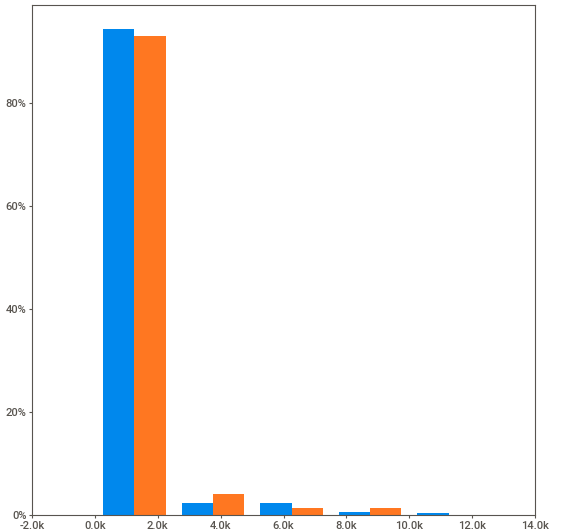
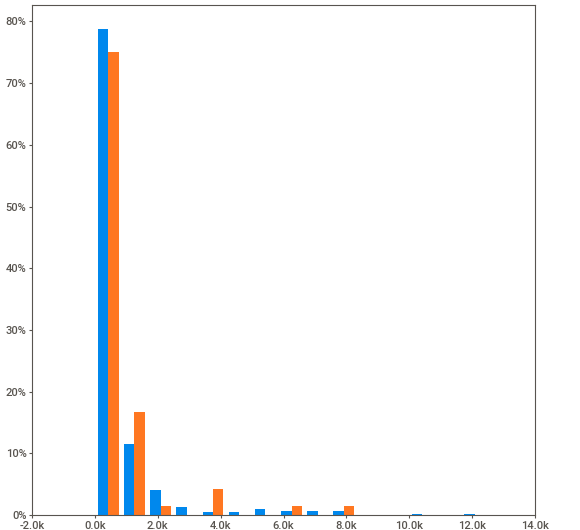
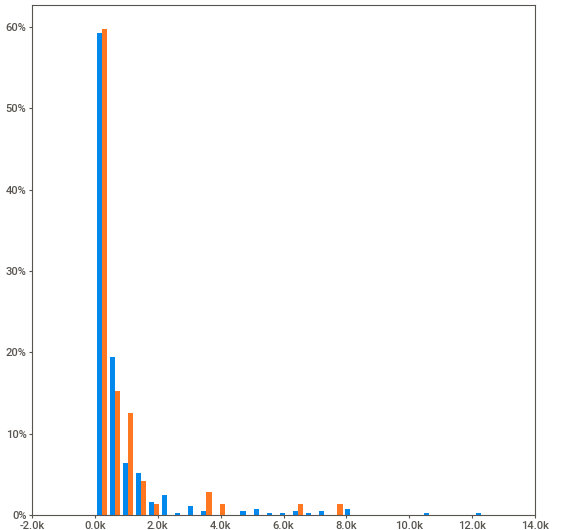
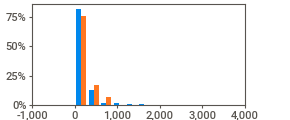
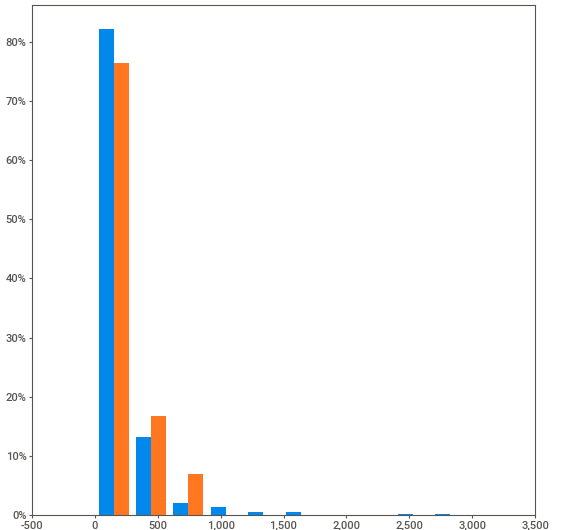
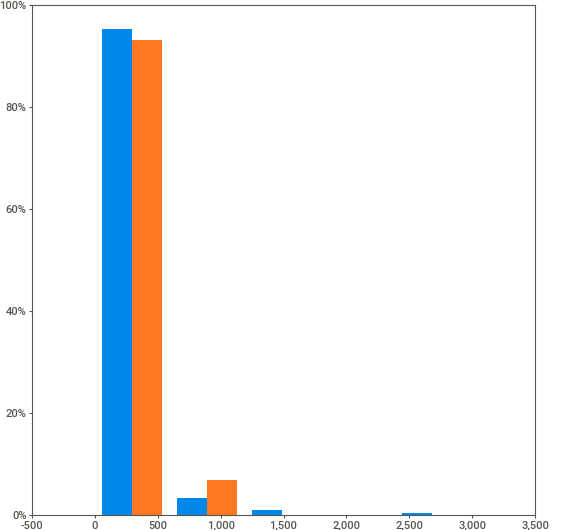
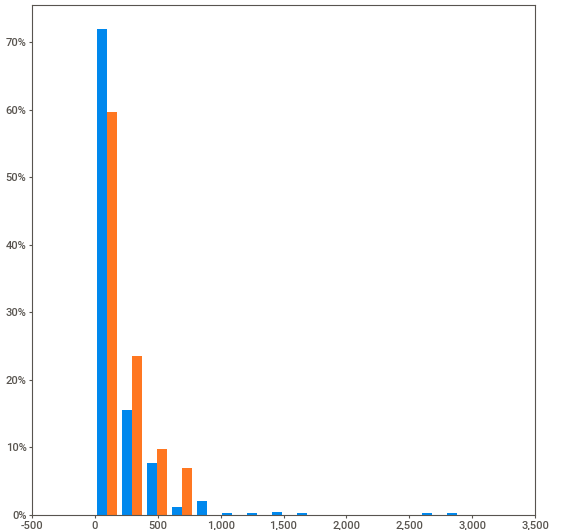
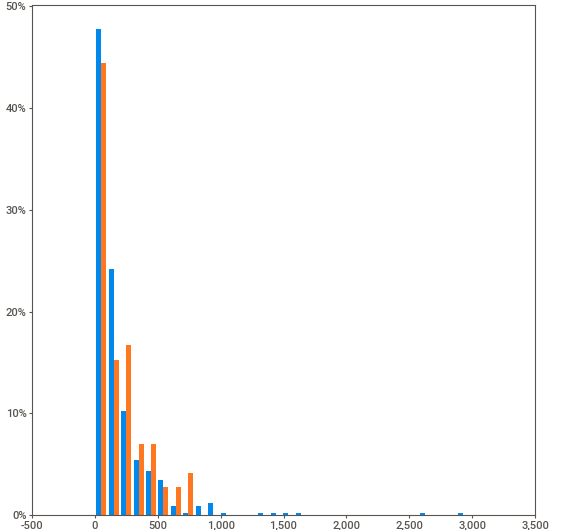
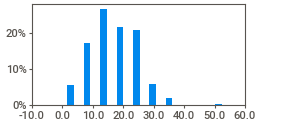
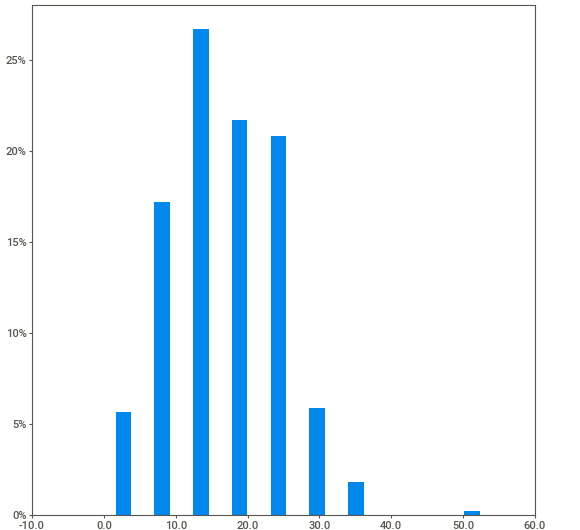
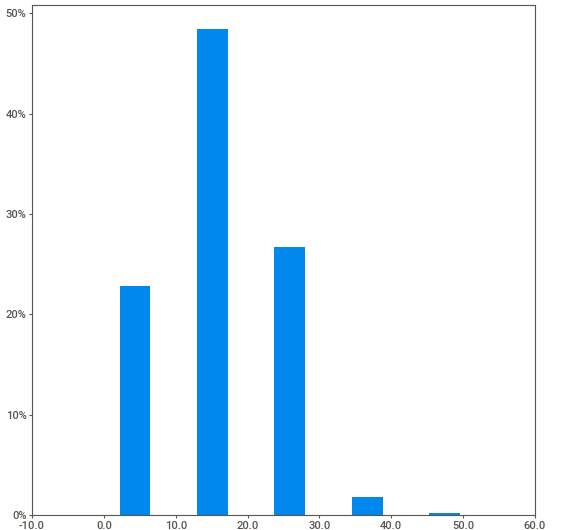
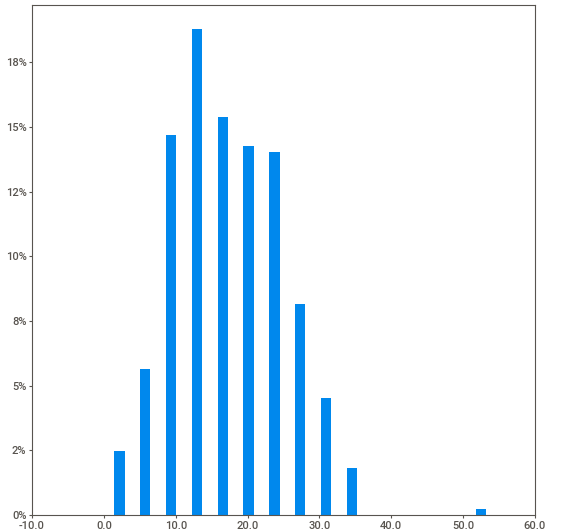
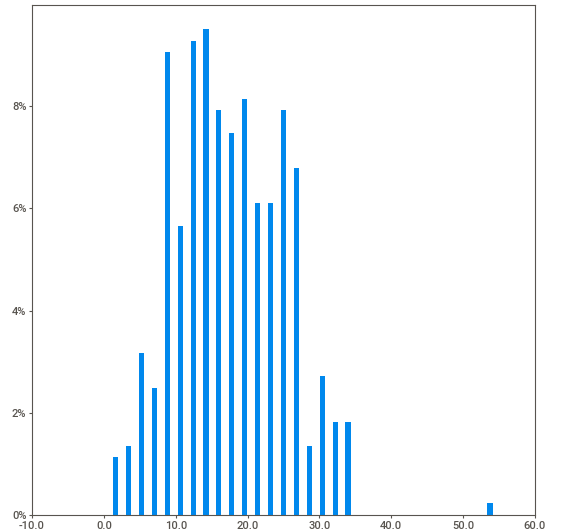
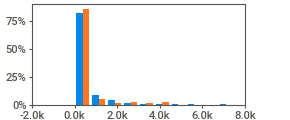
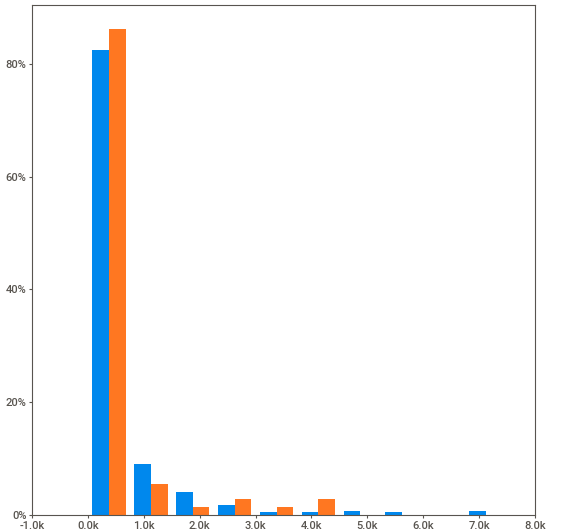
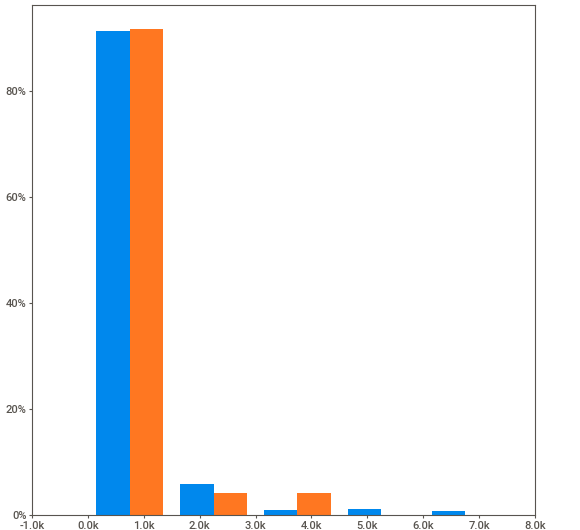
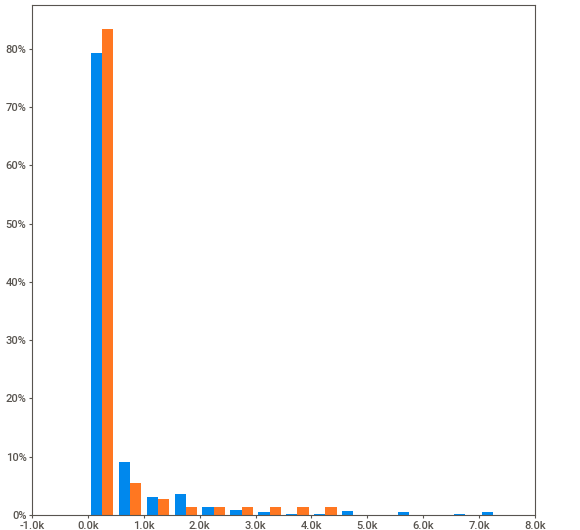
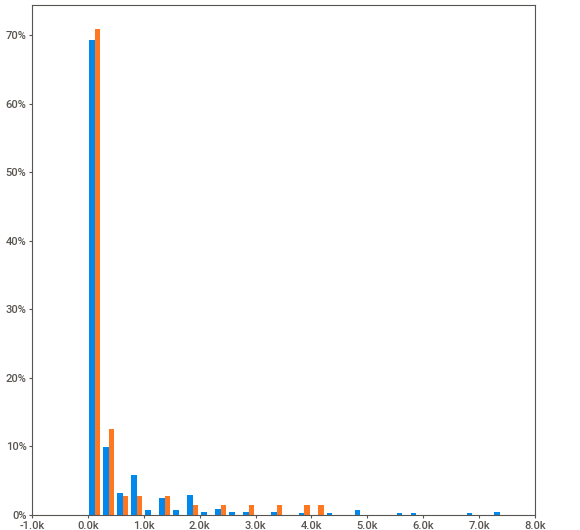
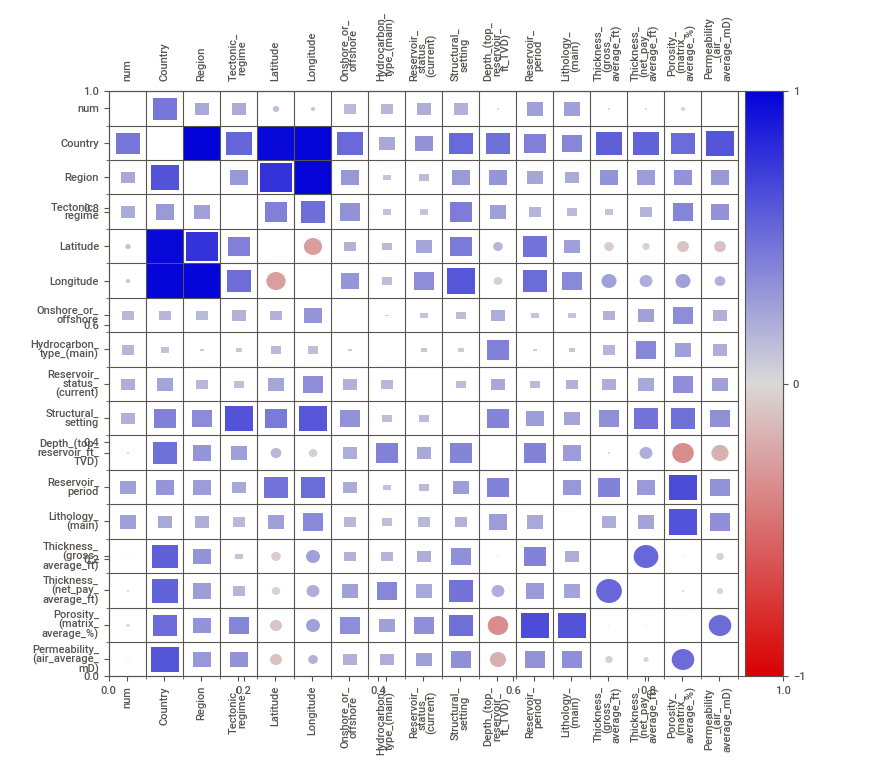
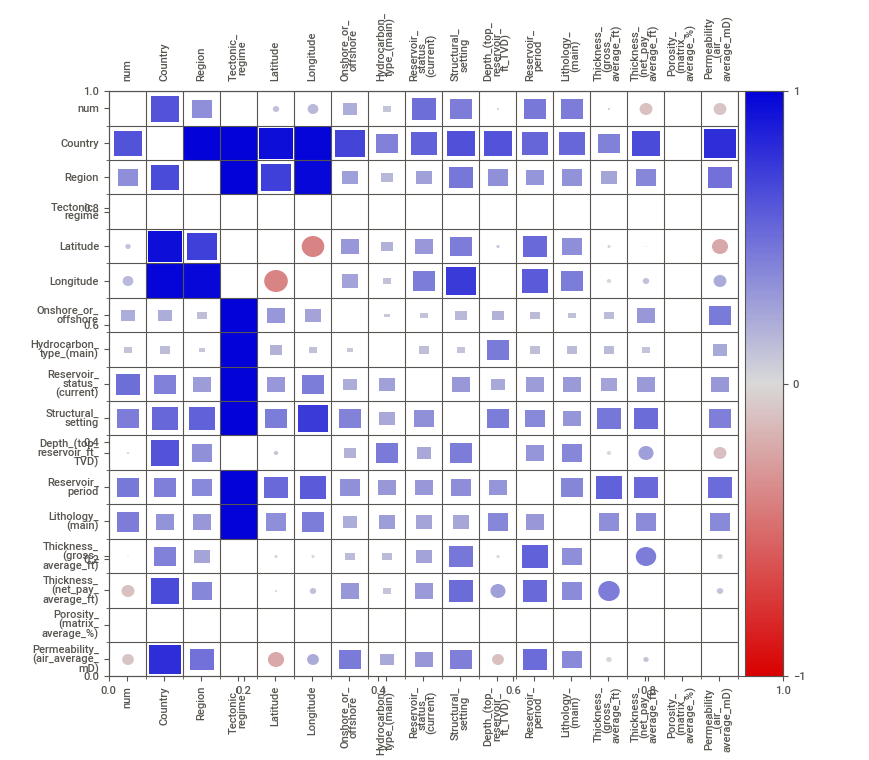

In [46]:
comparison.show_notebook()

In [47]:
comparison.show_html(filepath='eda_report.html', open_browser=True, layout='widescreen', scale=None)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
